### Diabetes -US Hospitals for Years 1999-2008

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge. The problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide proper diabetes care not only increases the managing costs for the hospitals (as the patients are readmitted) but also impacts the morbidity and mortality of the patients, who may face complications associated with diabetes.

## Dataset Information
**What do the instances in this dataset represent?** 

The instances represent hospitalized patient recordsdiagnosed with diabetes spitalization, etc.



**Additional Information**

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.



(1)	It is an inpatient encounter (a hospital admission).

(2)	It is a diabetic encounter, that is, one during which any kind of diabetes was entered into the system as a diagnosis.

(3)	The length of stay was at least 1 day and at most 14 days.

(4)	Laboratory tests were performed during the encounter.

(5)	Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab tests performed, HbA1c test result, diagnosis, number of medications, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

**Dataset Characteristics**

Multivariate

**Subject Area**
 
 Health and Medicine

**Associated Tasks**

 Classification

**Feature Type**

Categorical, Integer

# Instances

101766


# Features
 50

#### Importing Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#### Loading Dataset 

In [3]:
df=pd.read_csv("C:\\Users\\nikhi\\OneDrive\\Desktop\\project\\diabetic_data.csv")

In [4]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


#### Initial informations about the dataset

In [5]:
#Displaying first five rows of the dataset
print('The first five rows of the dataset:')
df_rows=df.head()
for index,rows in df_rows.iterrows():
    print(f'Rows{index+1}:') #The index label of the current row
    print(rows) #printing the content of the current row
    print('----------------------------')#printing a seperate line

The first five rows of the dataset:
Rows1:
encounter_id                                 2278392
patient_nbr                                  8222157
race                                       Caucasian
gender                                        Female
age                                           [0-10)
weight                                             ?
admission_type_id                                  6
discharge_disposition_id                          25
admission_source_id                                1
time_in_hospital                                   1
payer_code                                         ?
medical_specialty           Pediatrics-Endocrinology
num_lab_procedures                                41
num_procedures                                     0
num_medications                                    1
number_outpatient                                  0
number_emergency                                   0
number_inpatient                                   0
dia

In [6]:
#The shape of the dataset
print('The shape of the dataset:',df.shape)
num_rows,num_cols=df.shape
print(f'Number of rows:{num_rows}')
print(f'Number of columns:{num_cols}')

The shape of the dataset: (101766, 50)
Number of rows:101766
Number of columns:50


In [7]:
#Basic informations from the dataset like Column names,datatypes and nonnull values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
#Descriptive statistics of numerical variables only
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.020000e+00,1.450000e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.720000e+00,5.280000e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.750000e+00,4.060000e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.400000e+00,2.990000e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.310000e+01,1.967000e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.340000e+00,1.710000e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602000e+01,8.130000e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.700000e-01,1.270000e+00,0.0,0.0,0.0,0.000000e+00,42.0


- **count =** The number of non-null values.
- **mean =** Avarage.
- **Standard Deviation (std)=** A measure of the spread of the variable's values around the mean. A higher standard deviation indicates greater variability in the data.
- **min =** The smallest value. 
- **25% =** It represents the value below which 25% of the data fall
- **50% =** It represents the value below which 50% of the data fall
- **75% =** It represents the value below which 75% of the data fall
- **max =** The largest value.

In [9]:
#Descriptive analysis of categorical variables only
df.describe(include=object).T.round(2)

,count,unique,top,freq
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,101766,10,?,98569
payer_code,101766,18,?,40256
medical_specialty,101766,73,?,49949
diag_1,101766,717,428,6862
diag_2,101766,749,276,6752
diag_3,101766,790,250,11555
max_glu_serum,5346,3,Norm,2597


In [10]:
#Removing unwanted columns

#From the Descriptive analysis of categorical variables its noticable that some columns has many missing/NaN values
print(df['weight'].value_counts(dropna=False))
print('--------------')
print(df['payer_code'].value_counts(dropna=False))
print('--------------')
print(df['medical_specialty'].value_counts(dropna=False))
print('--------------')
print(df['max_glu_serum'].value_counts(dropna=False))
print('--------------')
print(df['A1Cresult'].value_counts(dropna=False))



weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64
--------------
payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64
--------------
medical_specialty
?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: count, Length: 73, dtype: int64
---------

In [11]:
#Deleting some columns related to patient id which is unnecessary to the model building
df_new=df.drop(columns=['weight','medical_specialty','max_glu_serum','encounter_id','patient_nbr'],axis=1)

#### Columns Removed
**weight:**

Reason: Over 96% of the values were missing (?), making it unreliable for modeling.

**medical_specialty:**

Reason: Nearly 50% missing data, and the high cardinality (73 categories) complicates encoding. If there's no strong domain knowledge indicating its significance, removing it simplifies preprocessing.

**max_glu_serum:**

Reason: Over 94% of values are missing (NaN), and imputing such a large proportion might introduce noise.

**encounter_id and patient_nbr:**

Reason: These are identifiers, not features directly correlated with the outcome (readmitted). They don't provide predictive value for the model.

# <font color="#686868" size="8"> Data Exploration(EDA) 🔍</font>

Exploratory Data Analysis (EDA), is an essential step in the machine learning pipeline. It involves **examining** and **visualizing the characteristics of a dataset to gain insights**, **understand patterns**, **detect anomalies**, and **prepare the data for further analysis** and **modeling**. some common techniques used in data exploration:
- Data Visualization
- Data Cleaning
- Data Preprocessing

# <font color="#4863A0"> Data Visualization

Creating visual representations such as **histograms**,**scatter plots**, **box plots**, and **heatmaps** to explore the distribution, relationships, and trends within the dataset. Visualization aids in identifying **patterns**, **correlations**, and **potential insights** that may not be apparent from just looking at the raw data. there are some ways to discover it:
- Graphical Analysis
    - Bar Charts
    - Pie Charts 
    - Histograms
- Correlation Analysis
- Data Relationships Analysis

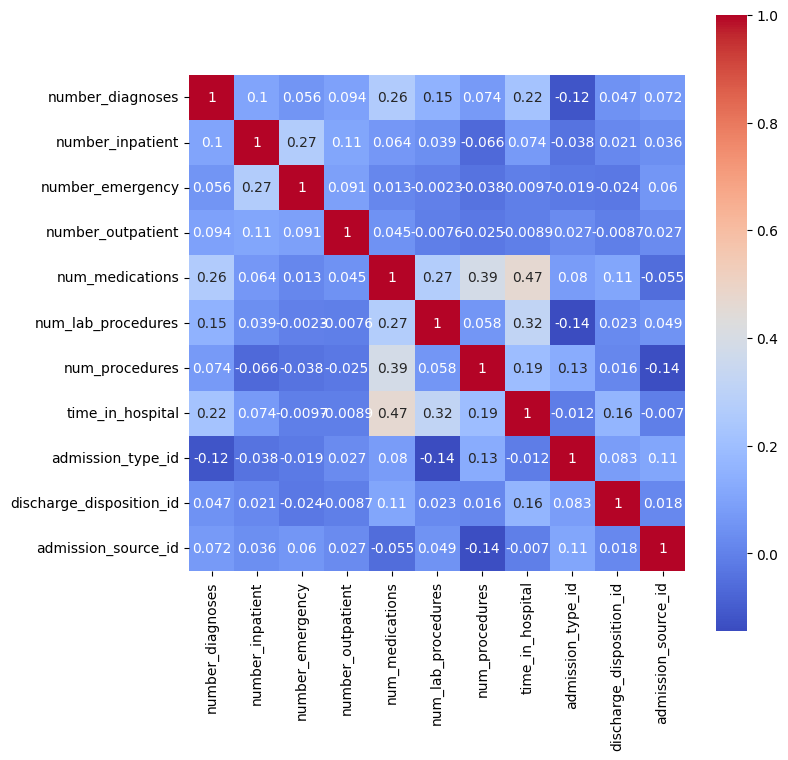

In [12]:
#Checking the correlation using heatmap
#correlation between numeric variables
numeric_corr=df_new[['number_diagnoses','number_inpatient','number_emergency','number_outpatient','num_medications','num_lab_procedures','num_procedures','time_in_hospital','admission_type_id','discharge_disposition_id','admission_source_id']]
plt.figure(figsize=(8,8))
sns.heatmap(numeric_corr.corr(),annot=True,square=True,cmap='coolwarm')
plt.show()

##### Graphycal analysis

In [13]:
#Gender analysis
gender_analysis=df_new['gender'].value_counts(dropna=False)
print(gender_analysis)

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64


In [14]:
#Replacing unknown/invalid with NaN in Gender
df_new['gender'].replace(r'Unknown/Invalid',np.nan,inplace=True)

In [15]:
df_new['gender']=df_new['gender'].fillna(df_new['gender'].mode()[0])

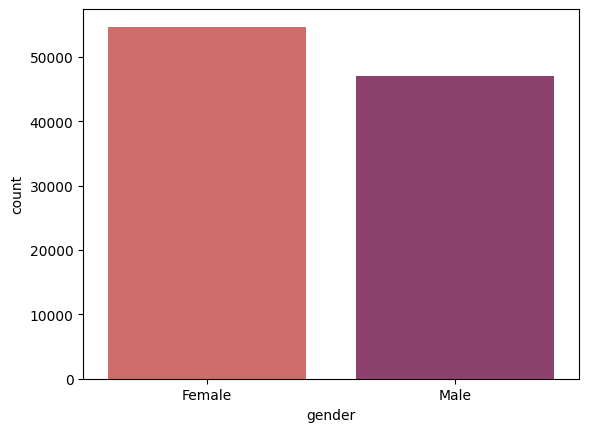

In [16]:
#bar chart analysis for 'gender' feature
sns.countplot(x='gender',data=df_new,palette='flare')
plt.show()

In [17]:
#Age analysis
df_new['age'].value_counts(dropna=False)

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

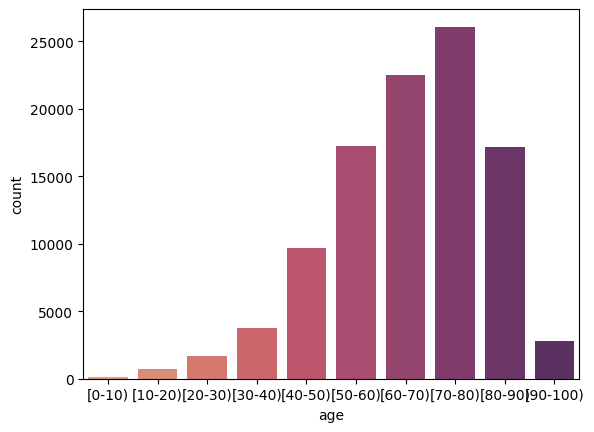

In [18]:
#Bar chart analysis for 'Age' feature
sns.countplot(x='age',data=df_new,palette='flare')
plt.show()

In [19]:
#Replacing unknown values to NaN in feature Payer code
df_new['payer_code'].replace(r'?',np.nan,inplace=True)

In [20]:
#Sum of null values.
df_new.isnull().sum()

race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone 

#### A1Cresult and payer code has more null values. Deleting columns may effect the model.
#### So droping rows that contasins null values 

In [21]:
df_new.dropna(subset=['A1Cresult'],inplace=True)

In [22]:
#df_new['A1Cresult'].fillna(df_new['A1Cresult'].mode()[0], inplace=True)

In [23]:
df_new.isnull().sum()

race                           0
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
payer_code                  6890
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                         0
diag_2                         0
diag_3                         0
number_diagnoses               0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose  

In [24]:
df_new.dropna(subset=['payer_code'],inplace=True)

In [25]:
#df_new['payer_code'].fillna(df_new['payer_code'].mode()[0], inplace=True)

In [26]:
df_new.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [27]:
#Analysis of race feature
df_new['race'].value_counts(dropna=False)

race
Caucasian          7543
AfricanAmerican    1738
?                   345
Hispanic            249
Other               175
Asian                78
Name: count, dtype: int64

In [28]:
#replacing the unknown value with Nan
df_new['race'].replace('?',np.nan,inplace=True)

In [29]:
#Filling the null values using mode imputation
df_new['race']=df_new['race'].fillna(df_new['race'].mode()[0])

In [30]:
df_new['race'].value_counts(dropna=False)

race
Caucasian          7888
AfricanAmerican    1738
Hispanic            249
Other               175
Asian                78
Name: count, dtype: int64

In [31]:
#Analysis of some of the features in the dataset
print(df_new['metformin'].value_counts(dropna=False))
print('------------------')
print(df_new['repaglinide'].value_counts(dropna=False))
print('------------------')
print(df_new['nateglinide'].value_counts(dropna=False))
print('------------------')
print(df_new['chlorpropamide'].value_counts(dropna=False))
print('------------------')
print(df_new['glimepiride'].value_counts(dropna=False))
print('------------------')
print(df_new['acetohexamide'].value_counts(dropna=False))
print('------------------')
print(df_new['glipizide'].value_counts(dropna=False))
print('------------------')
print(df_new['glyburide'].value_counts(dropna=False))
print('------------------')
print(df_new['tolbutamide'].value_counts(dropna=False))
print('------------------')
print(df_new['pioglitazone'].value_counts(dropna=False))
print('------------------')
print(df_new['rosiglitazone'].value_counts(dropna=False))
print('------------------')
print(df_new['miglitol'].value_counts(dropna=False))
print('------------------')
print(df_new['troglitazone'].value_counts(dropna=False))
print('------------------')
print(df_new['tolazamide'].value_counts(dropna=False))
print('------------------')
print(df_new['examide'].value_counts(dropna=False))
print('------------------')
print(df_new['citoglipton'].value_counts(dropna=False))
print('------------------')
print(df_new['insulin'].value_counts(dropna=False))
print('------------------')
print(df_new['payer_code'].value_counts(dropna=False))
print('------------------')
print(df_new['diag_1'].value_counts(dropna=False))
print('------------------')
print(df_new['diag_2'].value_counts(dropna=False))
print('------------------')
print(df_new['diag_3'].value_counts(dropna=False))

metformin
No        7600
Steady    2215
Up         228
Down        85
Name: count, dtype: int64
------------------
repaglinide
No        9867
Steady     229
Up          26
Down         6
Name: count, dtype: int64
------------------
nateglinide
No        10046
Steady       76
Up            5
Down          1
Name: count, dtype: int64
------------------
chlorpropamide
No        10125
Steady        3
Name: count, dtype: int64
------------------
glimepiride
No        9400
Steady     608
Up          79
Down        41
Name: count, dtype: int64
------------------
acetohexamide
No    10128
Name: count, dtype: int64
------------------
glipizide
No        8727
Steady    1218
Up         113
Down        70
Name: count, dtype: int64
------------------
glyburide
No        9223
Steady     761
Up          95
Down        49
Name: count, dtype: int64
------------------
tolbutamide
No        10127
Steady        1
Name: count, dtype: int64
------------------
pioglitazone
No        9282
Steady     784
Up   

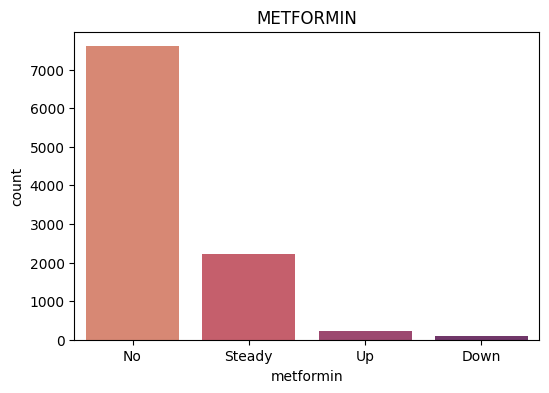

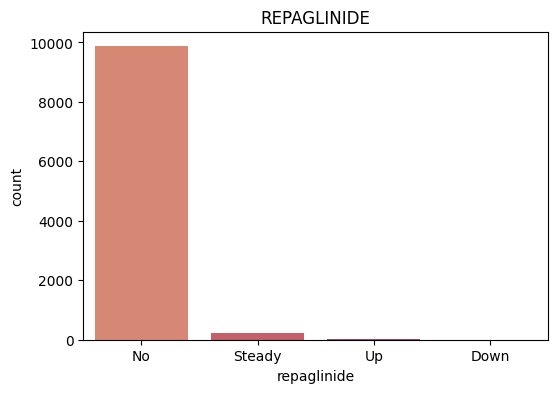

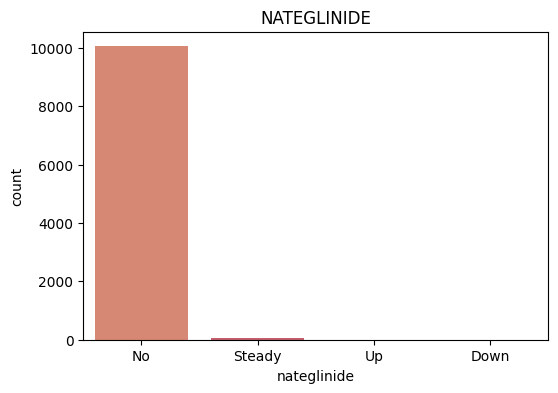

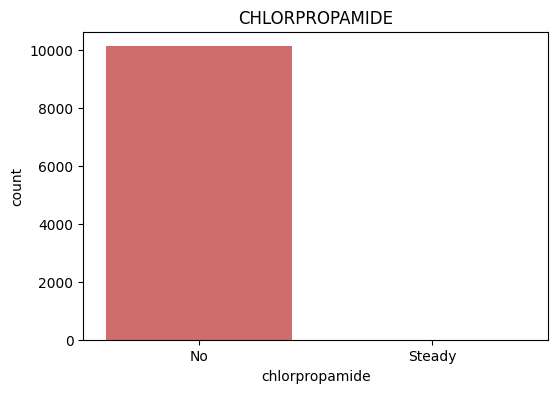

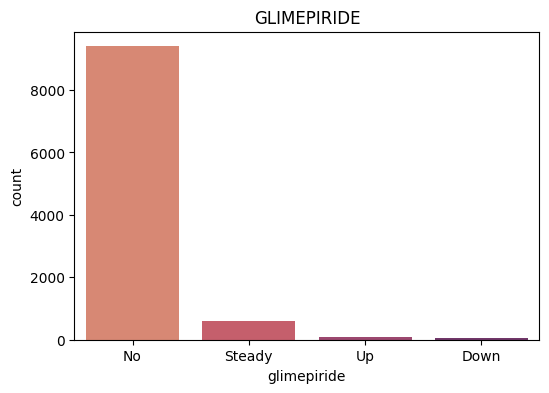

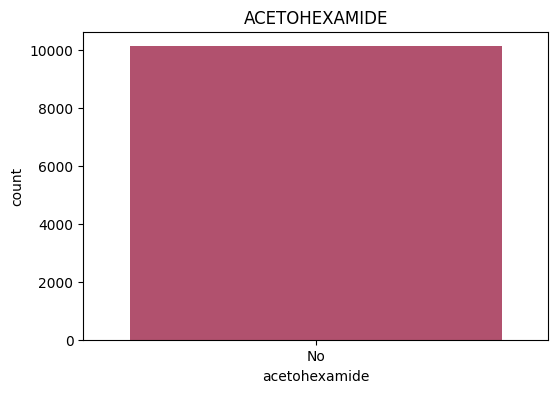

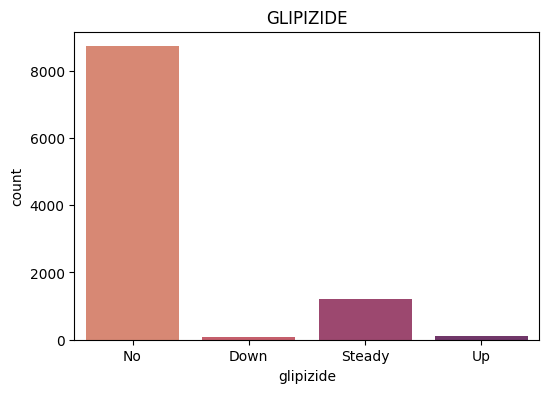

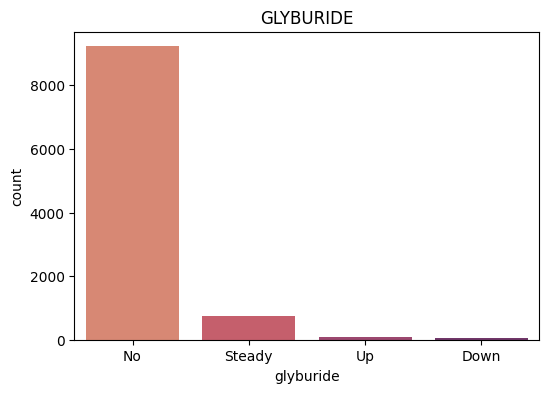

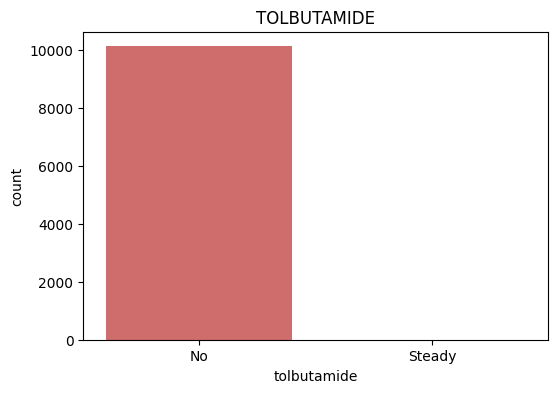

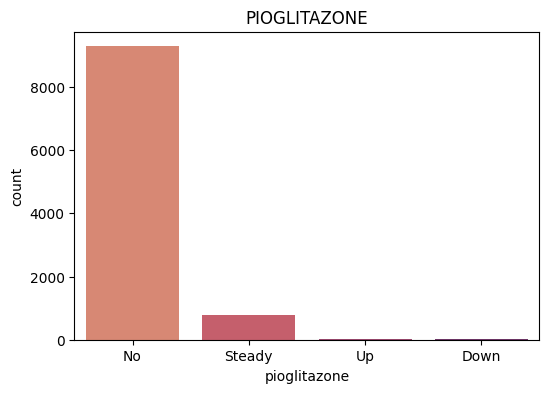

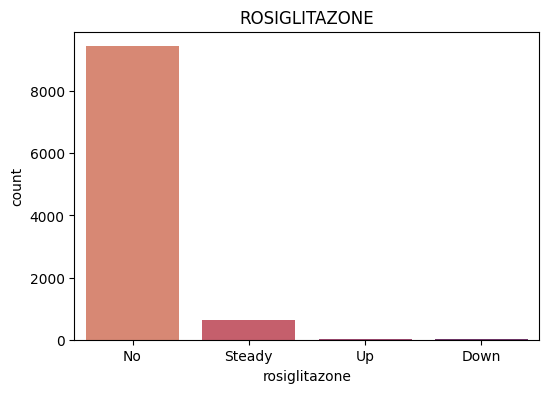

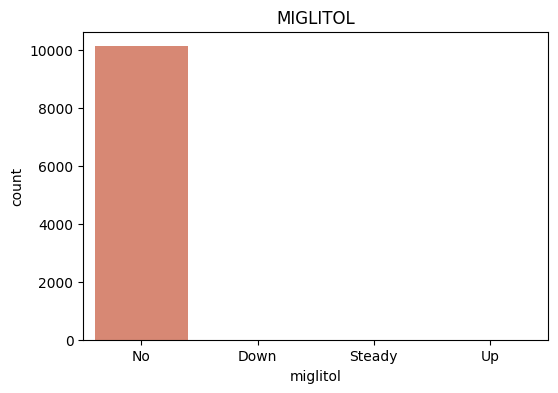

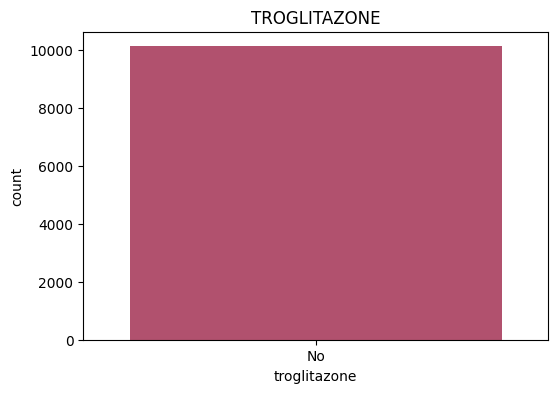

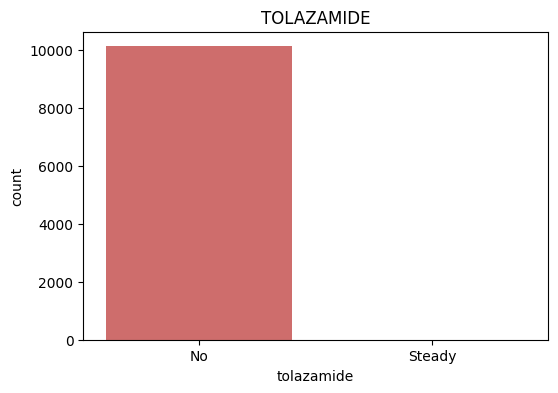

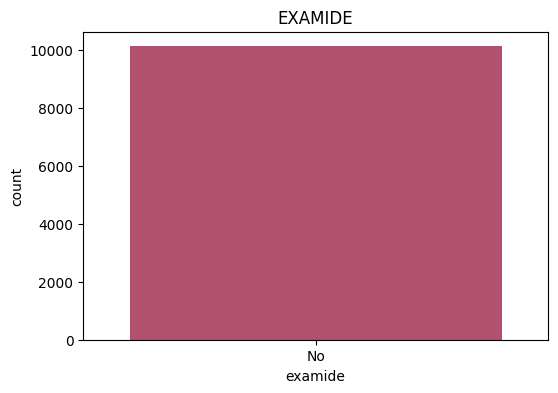

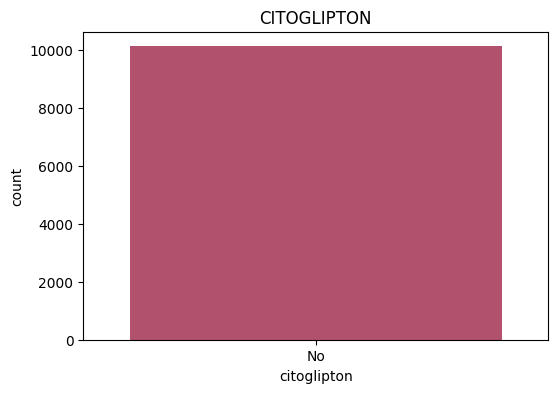

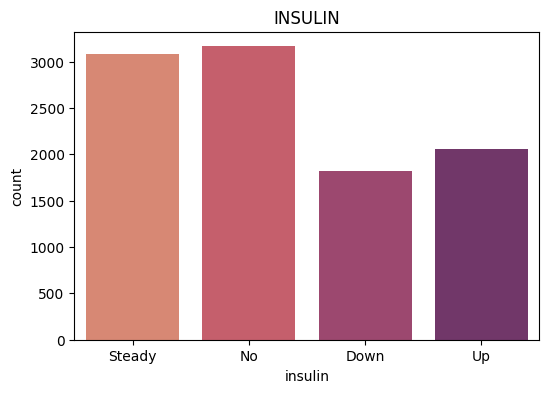

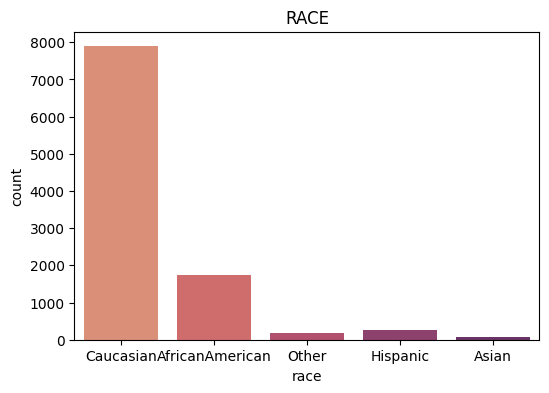

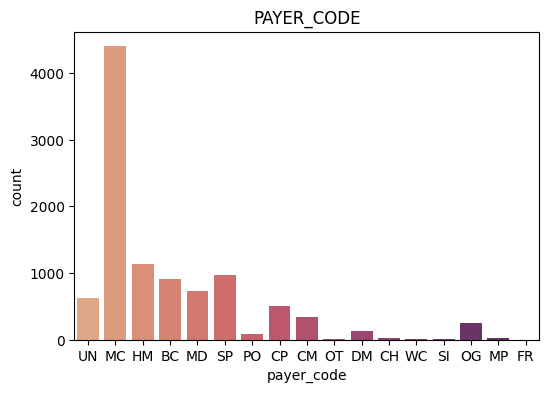

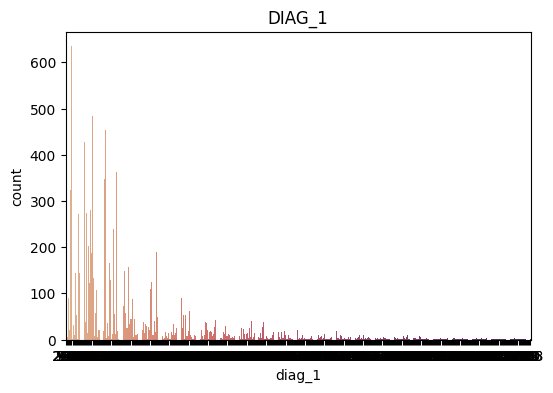

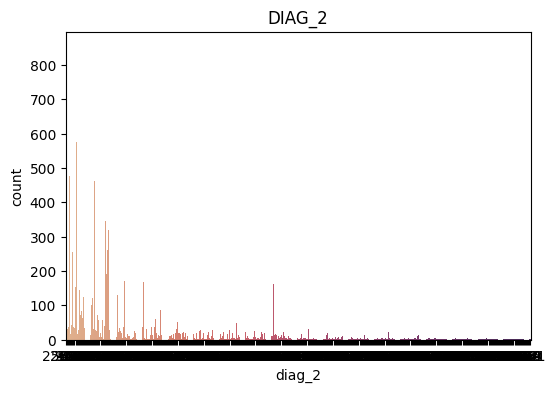

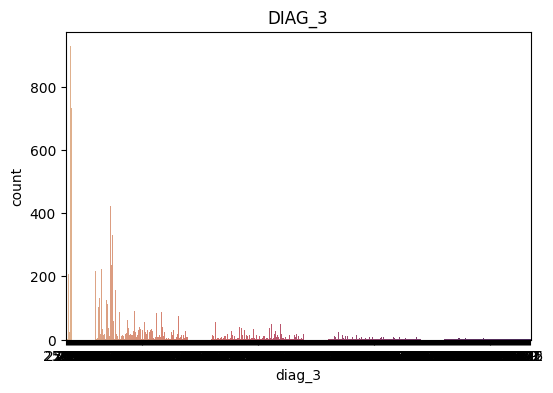

In [32]:
#Countplot of the some features
def f(i):
    plt.figure(figsize=(6,4))
    sns.countplot(x=i,data=df_new,palette='flare')
    plt.title(i.upper())
    plt.show()
    return
f('metformin')
f('repaglinide')
f('nateglinide')
f('chlorpropamide')
f('glimepiride')
f('acetohexamide')
f('glipizide')
f('glyburide')
f('tolbutamide')
f('pioglitazone')
f('rosiglitazone')
f('miglitol')
f('troglitazone')
f('tolazamide')
f('examide')
f('citoglipton')
f('insulin')
f('race')
f('payer_code')
f('diag_1')
f('diag_2')
f('diag_3')

## Imbalance data

Imbalanced data occurs when one class in your dataset significantly outnumbers the other. This can pose challenges for machine learning models, as they might be biased towards the majority class.

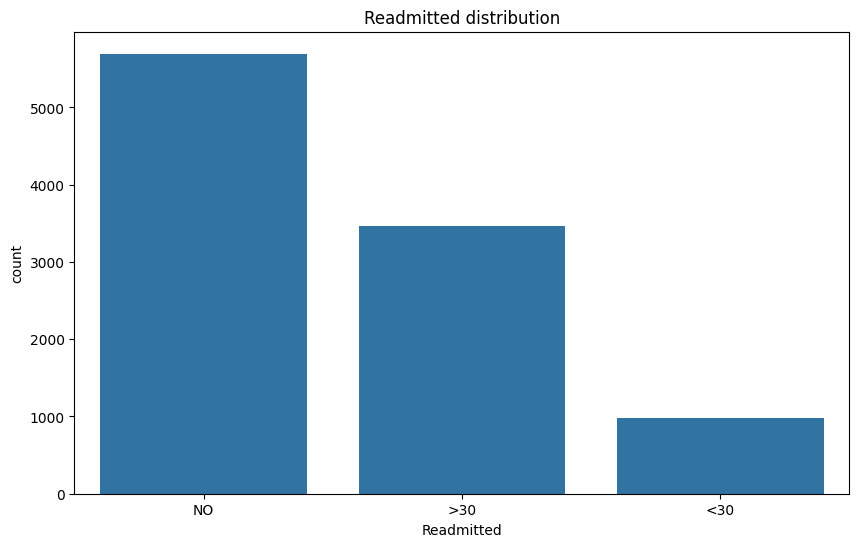

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x='readmitted',data=df_new)
plt.title('Readmitted distribution')
plt.xlabel('Readmitted')
plt.show()

### Addressing Imbalanced Data

If your data is imbalanced, you can consider techniques like:

Oversampling: Increasing the number of instances in the minority class.

Undersampling: Reducing the number of instances in the majority class.

Class weighting: Adjusting the weights of different classes during model training.

Ensemble methods: Combining multiple models to improve performance.

Remember: The best approach depends on the specific characteristics of your dataset and the problem you're trying to solve.

In [34]:
#seperating features and target
X=df_new.drop('readmitted',axis=1)
Y=df_new['readmitted']
from imblearn.over_sampling import RandomOverSampler

#Applying random over sammpling
ros=RandomOverSampler(random_state=42)
X_resampled,Y_resampled=ros.fit_resample(X,Y)

#creating new dataset with resampled data
df_new1=pd.concat([X_resampled, Y_resampled], axis=1)

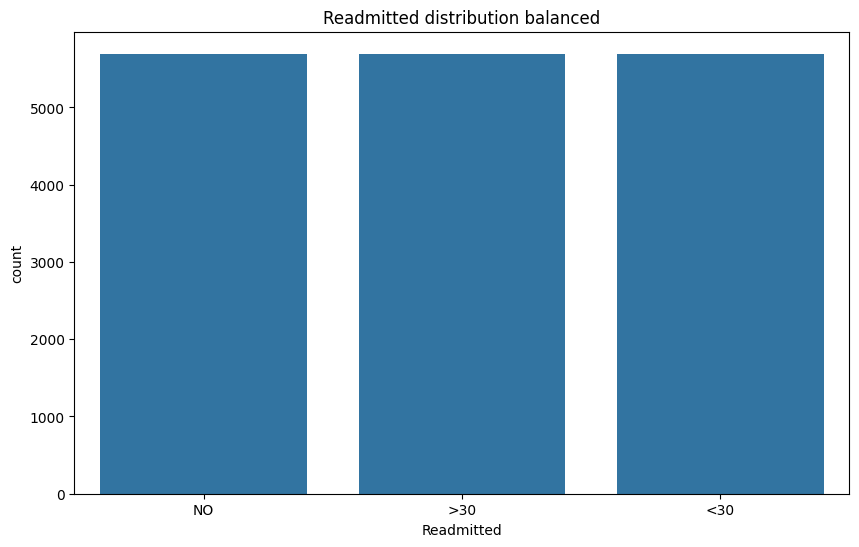

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='readmitted',data=df_new1)
plt.title('Readmitted distribution balanced')
plt.xlabel('Readmitted')
plt.show()

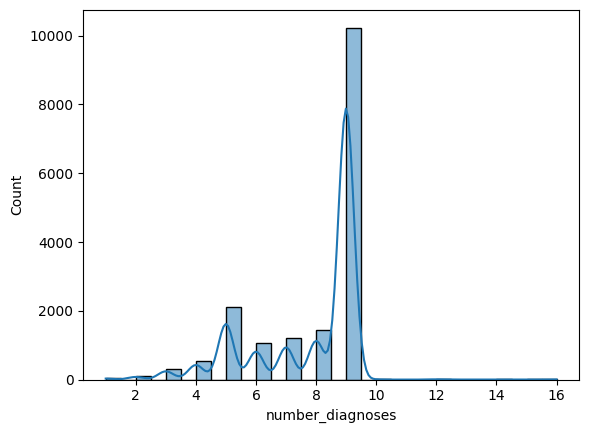

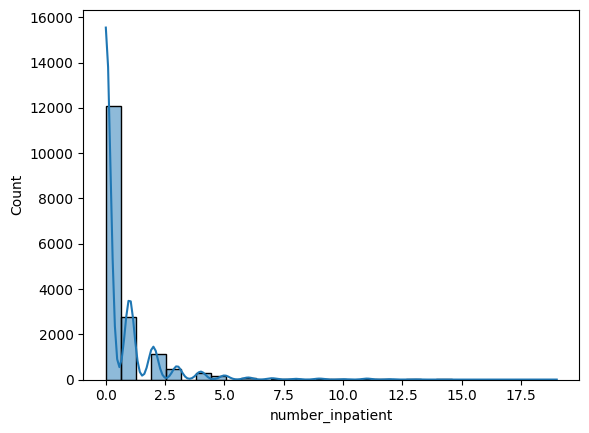

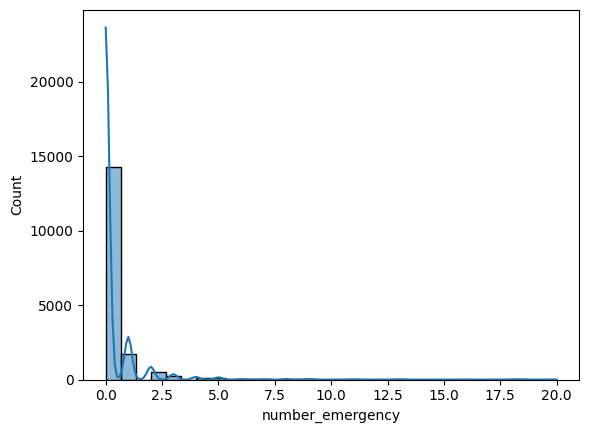

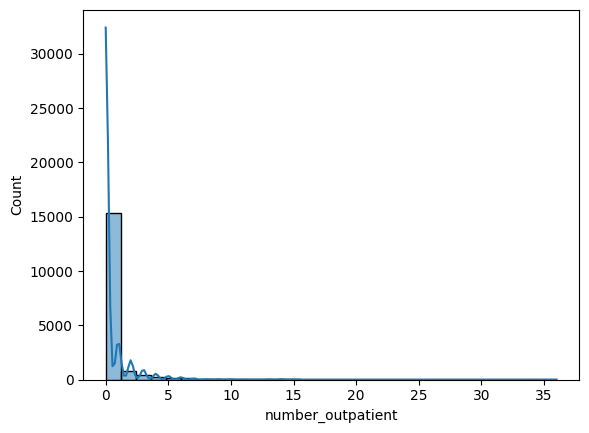

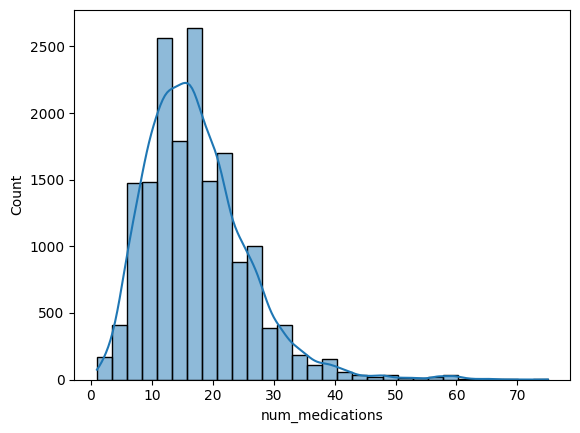

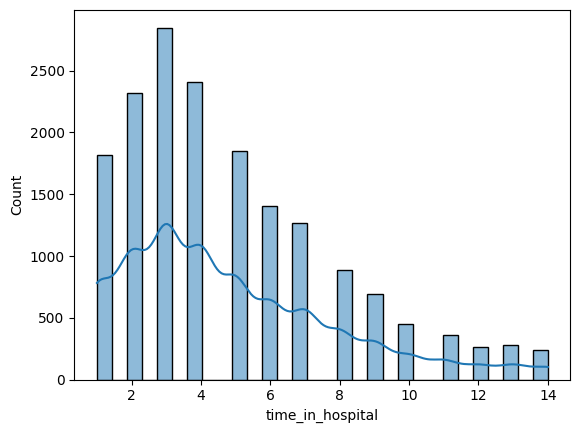

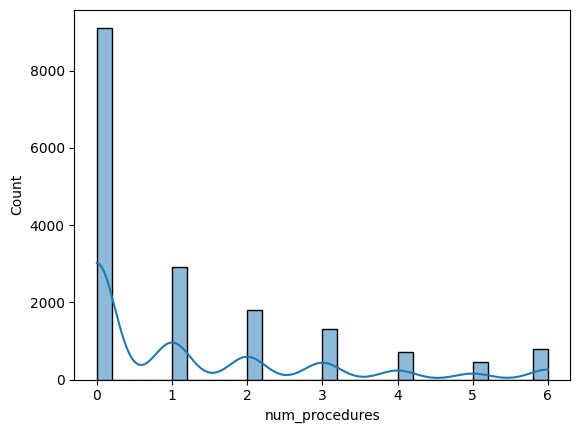

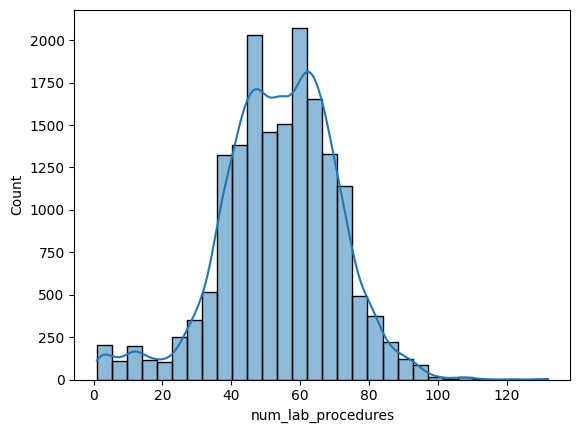

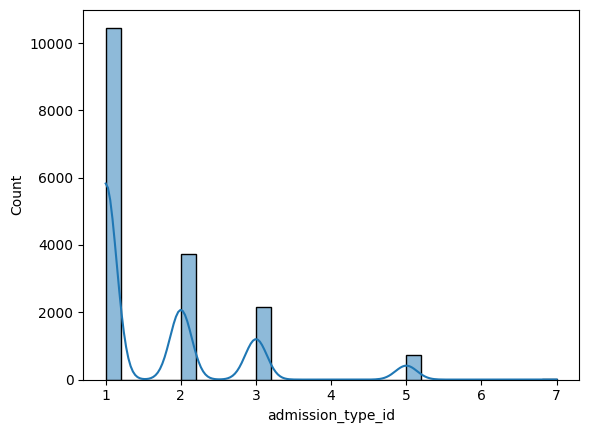

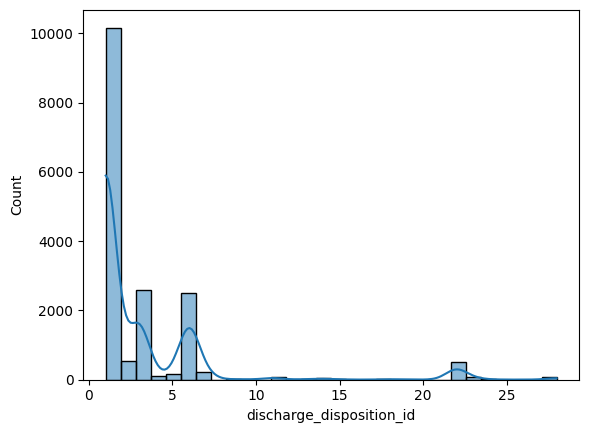

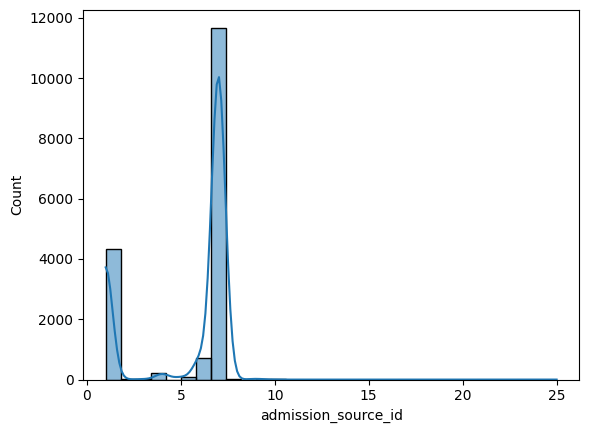

In [36]:
#Histogram distribution of numerical values, the distribution of histogram is also helps to find if there is outliers or not
def n(i):
    sns.histplot(data=df_new1,x=i,bins=30,kde=True)
    plt.show()
    return
n('number_diagnoses')
n('number_inpatient')
n('number_emergency')
n('number_outpatient')
n('num_medications')
n('time_in_hospital')
n('num_procedures')
n('num_lab_procedures')
n('admission_type_id')
n('discharge_disposition_id')
n('admission_source_id')

From the above analysis **Discharge disposition id**,**Admission type id**,**Number of procedures**,**Time in hospital**,**Number of medications**,**number_outpatient**,**number_emergency**,**number_inpatient** are posetively skewed. **number_diagnoses** is negatively skewed. All has outliers

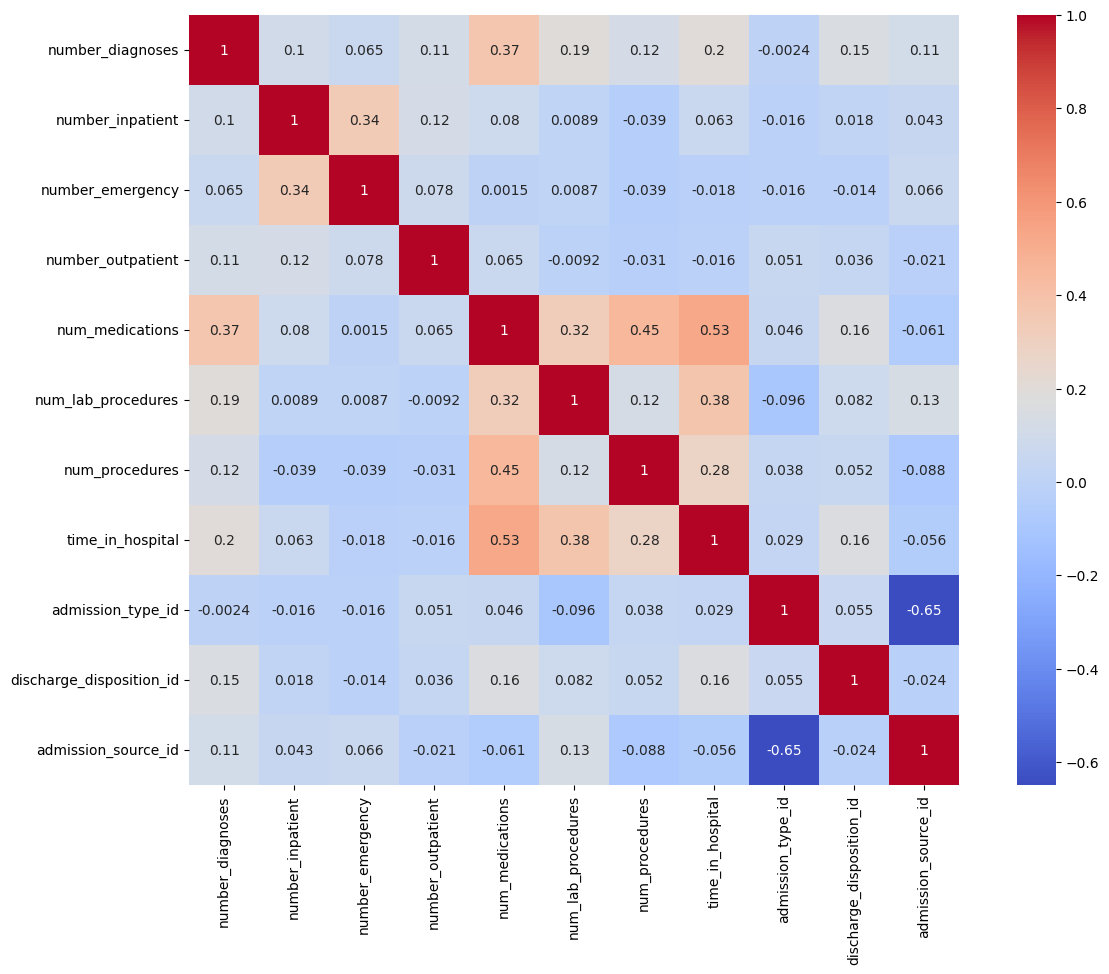

In [37]:
#Checking the correlation using heatmap
#correlation between numeric variables
numeric_corr=df_new[['number_diagnoses','number_inpatient','number_emergency','number_outpatient','num_medications','num_lab_procedures','num_procedures','time_in_hospital','admission_type_id','discharge_disposition_id','admission_source_id']]
plt.figure(figsize=(15,10))
sns.heatmap(numeric_corr.corr(),annot=True,square=True,cmap='coolwarm')
plt.show()

**Looks like the numerical variables are independant to each other**

# <font color="#4863A0"> Data Cleaning 🧹</font>
Data cleaning refers to the process of **identifying**, **correcting**, and **removing errors**, **inconsistencies**, and **inaccuracies** from a dataset. It involves transforming raw data into a clean and structured format that is suitable for analysis, modeling, and other data-related tasks, including:
- Remove Unneeded Features
- Handling Missing Values
- Encoding Categorical Variables
- Handling Outliers
- Handling Duplicates

Already removed unwanted columns 

## <font size="4" face="WildWest">2. Handling Missing Values</font>

**Missing values** are data points that are absent or not recorded for certain variables in a dataset. This can happen because of mistakes such as data entry errors, equipment failures, or simply because the information is not available.

 **How to detect missing values?**
 - Look for blank cells and use data analysis tools that can identify missing values like .isnull() functoin.

 **Decision options:**
1. Keep them 
    - Not ideal, as missing values can lead to biased analyses and inaccurate predictions.
2. Reassign new values to them (Using specific techniques)
    - Imputation (Y):
        - Replace missing values with estimated or calculated values based on the available data. This can be done using various methods such as:
            1. **Mean/Median Imputation:** Replace with the average (mean) or middle value (median) for numerical data.
            2. **Mode Imputation:** Replace with the most frequent value.
    - Forward/Backward Fill (N):
        - For time-series data, missing values can be filled with the last observed value (forward fill) or the next observed value (backward fill).
    - Interpolation (N):
        - Estimate missing values based on the trend or pattern observed in the existing data points.
3. Delete them (Sometimes necessary, especially if missing values are extensive and cannot be reasonably imputed without introducing significant bias.)

In [38]:
null_values=df_new1.isnull().sum()
print(null_values)

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

***There is no major null or missing values***

**Encoding categorical variables**

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
''''#label_encoder=LabelEncoder()
def label(i):
    print(df_new1[i].value_counts(dropna=False))
    df_new=pd.get_dummies(data=df_new1,columns=[i])
    #print(df_new1[i].value_counts(dropna=False))
    print('-------------')
    print(df_onehot_encoded)
    return
label('gender')
label('age')
label('repaglinide')
label('nateglinide')
label('chlorpropamide')
label('glimepiride')
label('acetohexamide')
label('glipizide')
label('glyburide')
label('tolbutamide')
label('pioglitazone')
label('rosiglitazone')
label('acarbose')
label('miglitol')
label('troglitazone')
label('tolazamide')
label('examide')
label('citoglipton')
label('insulin')
label('glyburide-metformin')
label('glipizide-metformin')
label('glimepiride-pioglitazone')
label('metformin-rosiglitazone')
label('metformin-pioglitazone')
label('change')
label('diabetesMed')
label('race')
label('A1Cresult')
label('payer_code')
label('diag_1')
label('diag_2')
label('diag_3')
print(df_onehot_encoded)'''

"'#label_encoder=LabelEncoder()\ndef label(i):\n    print(df_new1[i].value_counts(dropna=False))\n    df_new=pd.get_dummies(data=df_new1,columns=[i])\n    #print(df_new1[i].value_counts(dropna=False))\n    print('-------------')\n    print(df_onehot_encoded)\n    return\nlabel('gender')\nlabel('age')\nlabel('repaglinide')\nlabel('nateglinide')\nlabel('chlorpropamide')\nlabel('glimepiride')\nlabel('acetohexamide')\nlabel('glipizide')\nlabel('glyburide')\nlabel('tolbutamide')\nlabel('pioglitazone')\nlabel('rosiglitazone')\nlabel('acarbose')\nlabel('miglitol')\nlabel('troglitazone')\nlabel('tolazamide')\nlabel('examide')\nlabel('citoglipton')\nlabel('insulin')\nlabel('glyburide-metformin')\nlabel('glipizide-metformin')\nlabel('glimepiride-pioglitazone')\nlabel('metformin-rosiglitazone')\nlabel('metformin-pioglitazone')\nlabel('change')\nlabel('diabetesMed')\nlabel('race')\nlabel('A1Cresult')\nlabel('payer_code')\nlabel('diag_1')\nlabel('diag_2')\nlabel('diag_3')\nprint(df_onehot_encoded)"

In [41]:
#Using one-hot encoding method
'''df_new1=pd.get_dummies(data=df_new1,columns=['gender',
                                             'age',
                                             'metformin',
                                             'repaglinide',
                                             'nateglinide',
                                             'chlorpropamide',
                                             'glimepiride',
                                             'acetohexamide',
                                             'glipizide',
                                             'glyburide',
                                             'tolbutamide',
                                             'pioglitazone',
                                             'rosiglitazone',
                                             'acarbose',
                                             'miglitol',
                                             'troglitazone',
                                             'tolazamide',
                                             'examide',
                                             'citoglipton',
                                             'insulin',
                                             'glyburide-metformin',
                                             'glipizide-metformin',
                                             'glimepiride-pioglitazone',
                                             'metformin-rosiglitazone',
                                             'metformin-pioglitazone',
                                             'change',
                                             'diabetesMed',
                                             'race',
                                             'A1Cresult',
                                             'payer_code',
                                             'diag_1',
                                             'diag_2',
                                             'diag_3'])'''

"df_new1=pd.get_dummies(data=df_new1,columns=['gender',\n                                             'age',\n                                             'metformin',\n                                             'repaglinide',\n                                             'nateglinide',\n                                             'chlorpropamide',\n                                             'glimepiride',\n                                             'acetohexamide',\n                                             'glipizide',\n                                             'glyburide',\n                                             'tolbutamide',\n                                             'pioglitazone',\n                                             'rosiglitazone',\n                                             'acarbose',\n                                             'miglitol',\n                                             'troglitazone',\n                                       

In [42]:
from sklearn.preprocessing import LabelEncoder

# Function to encode categorical features
def encode_column(df, column_name, encoding_type="label"):
    print(f"Encoding {column_name}...")
    
    if encoding_type == "label":
        # Apply Label Encoding for ordinal or nominal columns with few categories
        le = LabelEncoder()
        df[column_name] = le.fit_transform(df[column_name].fillna('Unknown'))  # handle NaNs if any
    
    elif encoding_type == "onehot":
        # Apply One-Hot Encoding for nominal columns
        df = pd.get_dummies(df, columns=[column_name], drop_first=True)  # drop_first to avoid multicollinearity
    
    elif encoding_type == "frequency":
        # Apply Frequency Encoding for the 'payer_code' column
        freq_encoding = df[column_name].value_counts() / len(df)
        df[column_name] = df[column_name].map(freq_encoding)
    
    return df

# List of columns to be encoded with the encoding type (label for ordinal, onehot for nominal, frequency for payer_code)
columns_to_encode = {
    'gender': 'label',
    'age': 'label',
    'metformin':'onehot',
    'repaglinide': 'label',
    'nateglinide': 'label',
    'chlorpropamide': 'label',
    'glimepiride': 'label',
    'acetohexamide': 'label',
    'glipizide': 'label',
    'glyburide': 'label',
    'tolbutamide': 'label',
    'pioglitazone': 'label',
    'rosiglitazone': 'label',
    'acarbose': 'label',
    'miglitol': 'label',
    'troglitazone': 'label',
    'tolazamide': 'label',
    'examide': 'label',
    'citoglipton': 'label',
    'insulin':'onehot',
    'glyburide-metformin': 'label',
    'glipizide-metformin': 'label',
    'glimepiride-pioglitazone': 'label',
    'metformin-rosiglitazone': 'label',
    'metformin-pioglitazone': 'label',
    'change': 'label',
    'diabetesMed': 'label',
    'race': 'onehot',
    'A1Cresult': 'label',  # If it's ordinal (e.g., Normal, >8, >7)
    'diag_1': 'onehot',  # You can treat these as nominal
    'diag_2': 'onehot',
    'diag_3': 'onehot',
    'payer_code': 'frequency'  # Apply frequency encoding to payer_code
}

# Apply the encoding function to each column
for column, encoding_type in columns_to_encode.items():
    df_new1 = encode_column(df_new1, column, encoding_type)

print("Encoding completed.")

Encoding gender...
Encoding age...
Encoding metformin...
Encoding repaglinide...
Encoding nateglinide...
Encoding chlorpropamide...
Encoding glimepiride...
Encoding acetohexamide...
Encoding glipizide...
Encoding glyburide...
Encoding tolbutamide...
Encoding pioglitazone...
Encoding rosiglitazone...
Encoding acarbose...
Encoding miglitol...
Encoding troglitazone...
Encoding tolazamide...
Encoding examide...
Encoding citoglipton...
Encoding insulin...
Encoding glyburide-metformin...
Encoding glipizide-metformin...
Encoding glimepiride-pioglitazone...
Encoding metformin-rosiglitazone...
Encoding metformin-pioglitazone...
Encoding change...
Encoding diabetesMed...
Encoding race...
Encoding A1Cresult...
Encoding diag_1...
Encoding diag_2...
Encoding diag_3...
Encoding payer_code...
Encoding completed.


In [43]:
df_new1

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,num_medications,...,diag_3_V55,diag_3_V57,diag_3_V58,diag_3_V60,diag_3_V61,diag_3_V62,diag_3_V64,diag_3_V65,diag_3_V66,diag_3_V85
0,0,7,1,3,6,12,0.056833,77,5,19,...,False,False,False,False,False,False,False,False,False,False
1,0,3,1,1,6,13,0.453322,75,2,16,...,False,False,False,False,False,False,False,False,False,False
2,0,3,2,1,4,11,0.453322,43,5,16,...,False,False,False,False,False,False,False,False,False,False
3,1,7,2,3,1,12,0.453322,68,1,20,...,False,False,False,False,False,False,False,False,False,False
4,1,7,1,3,7,10,0.453322,59,1,20,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17080,0,4,3,1,1,9,0.084928,52,0,23,...,False,False,False,False,False,False,False,False,False,False
17081,0,5,1,3,7,8,0.046591,62,2,30,...,False,False,False,False,False,False,False,False,False,False
17082,0,6,1,3,7,8,0.453322,81,1,20,...,False,False,False,False,False,False,False,False,False,False
17083,1,5,1,1,1,4,0.091893,43,0,20,...,False,False,False,False,False,False,False,False,False,False


In [44]:
#Transforming target variable
label_encoder=LabelEncoder()
print(df_new1['readmitted'].value_counts(dropna=False))
df_new1['readmitted']=label_encoder.fit_transform(df_new1['readmitted'])
print(df_new1['readmitted'].value_counts(dropna=False))

readmitted
NO     5695
>30    5695
<30    5695
Name: count, dtype: int64
readmitted
2    5695
1    5695
0    5695
Name: count, dtype: int64


## <font size="4" face="WildWest">4. Handling Outliers</font>

**Outliers** are data points that significantly differ from the rest of the observations in a dataset, often due to errors in data collection or genuine extreme values.

 **How to detect outliers?**
- Visualization data (Numerical values)

 **Decision options:**
1. Keep them - Not a good solution.
2. Reassign new values to them (Using specific techniques)
    - Capping Outliers (N)
        - Instead of removing outliers entirely, replace extreme values with more reasonable thresholds.
    - Robust Scaling (Y)
        - Use scaling methods less sensitive to outliers (e.g., IQR scaling, standardization with robust estimators).
            - Robust Scaling Function
            - IQR scaling
    - Replace with mean (N)
        - Replacing the outliers with the mean value
3. Delete them (N)

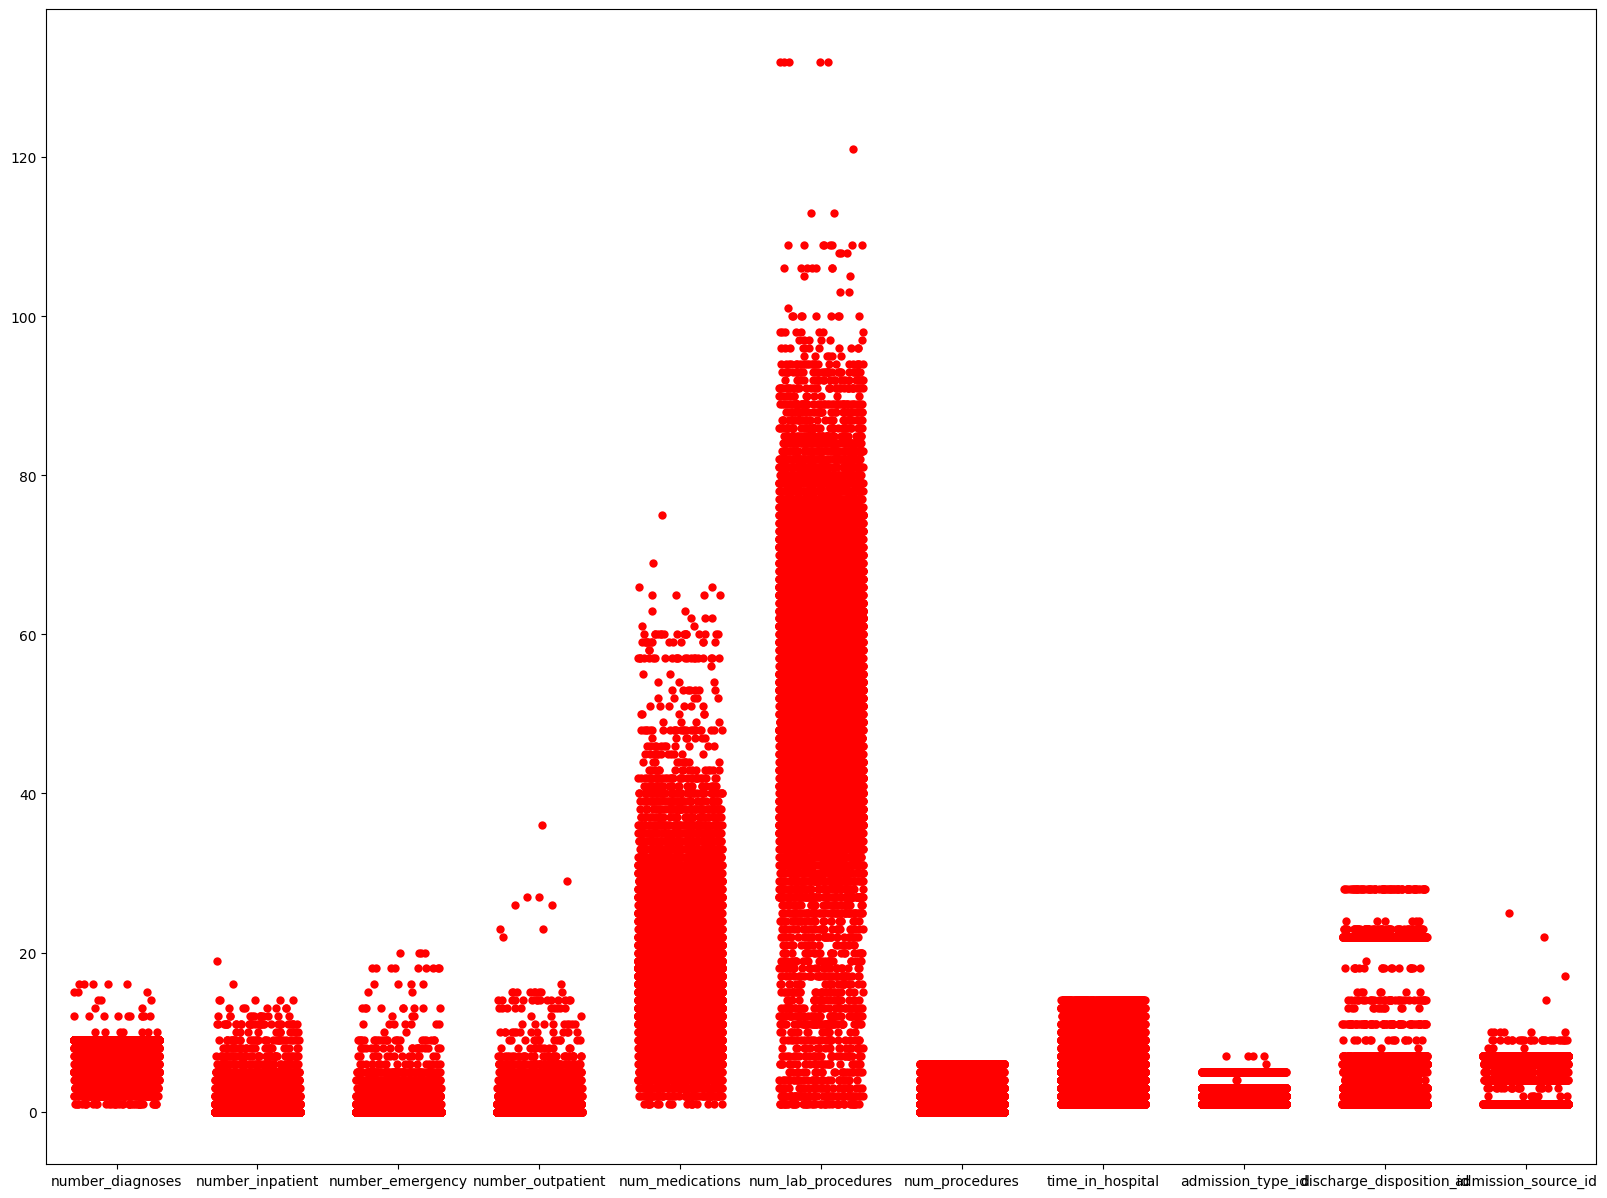

In [45]:
#Checking the outliers of numerical variables using stripplot
numerical_outliers=df_new1[['number_diagnoses','number_inpatient','number_emergency','number_outpatient','num_medications','num_lab_procedures','num_procedures','time_in_hospital','admission_type_id','discharge_disposition_id','admission_source_id']]
plt.figure(figsize=(20,15))
sns.stripplot(data=numerical_outliers,color='red',jitter=0.3,size=6)
plt.show()

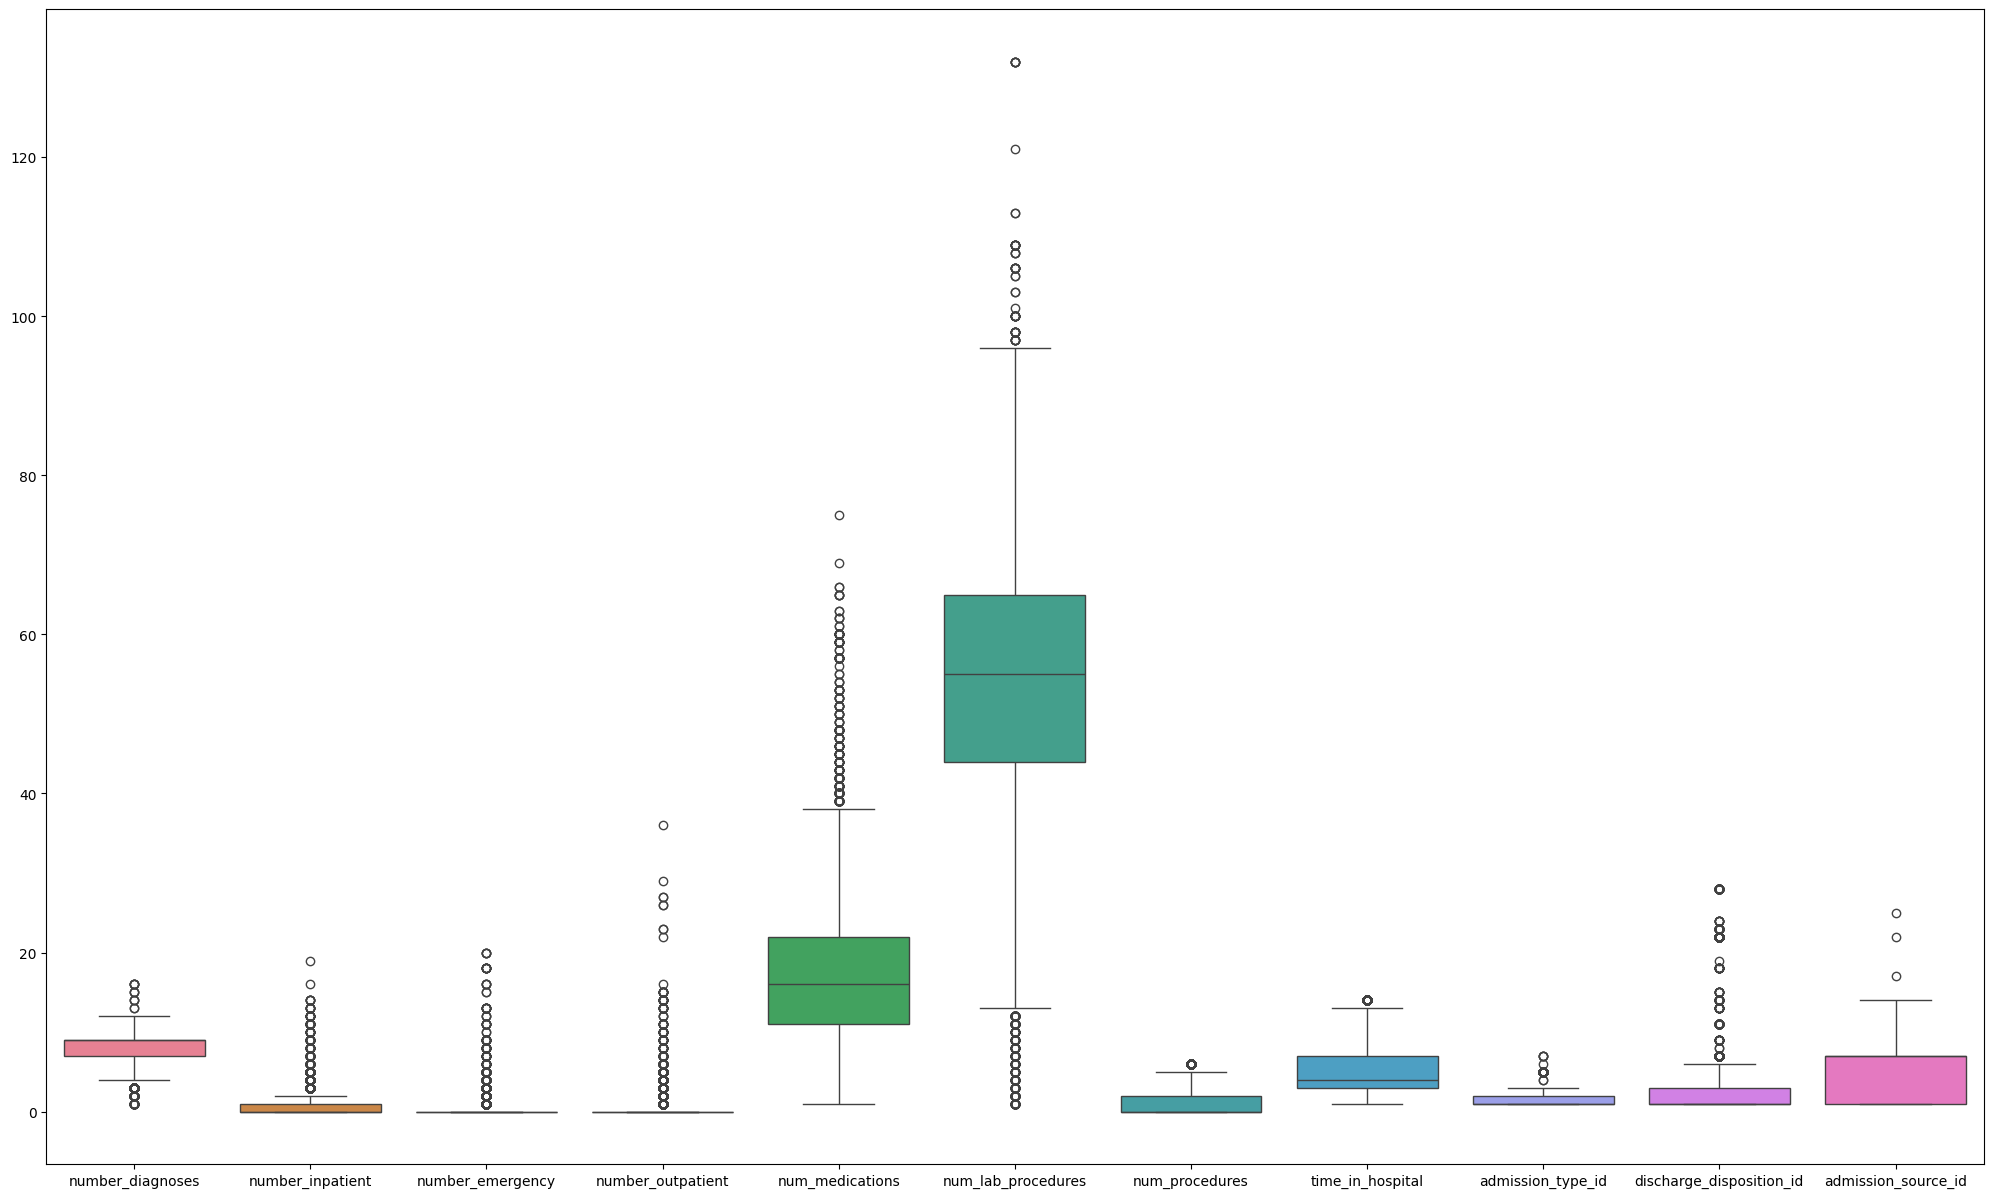

number_diagnoses           -1.177660
number_inpatient            4.190914
number_emergency            7.737850
number_outpatient           7.155997
num_medications             1.192503
num_lab_procedures         -0.391504
num_procedures              1.473384
time_in_hospital            0.958583
admission_type_id           1.808093
discharge_disposition_id    3.448650
admission_source_id        -1.004623
dtype: float64

In [46]:
plt.figure(figsize=(25,15))
sns.boxplot(numerical_outliers)
plt.show()
numerical_outliers.skew()

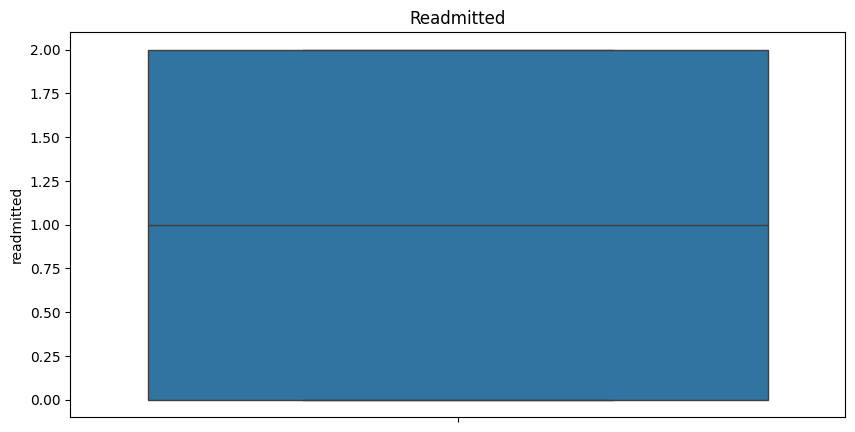

In [47]:
#Checking outliers or skewness of target variable
plt.figure(figsize=(10,5))
sns.boxplot(y=df_new1['readmitted'])
plt.title('Readmitted')
plt.show()

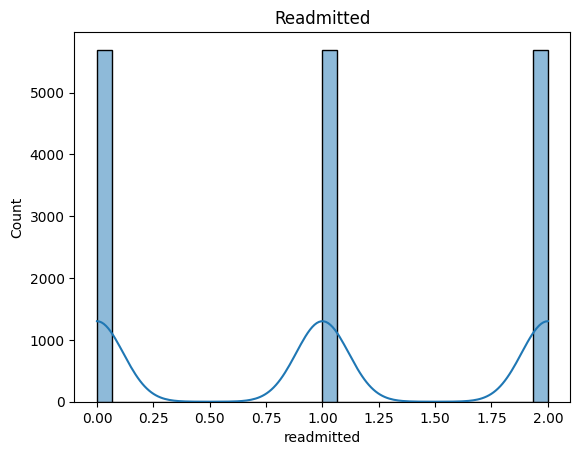

In [48]:
sns.histplot(data=df_new1,x='readmitted',bins=30,kde=True)
plt.title('Readmitted')
plt.show()

Treating outliers of numerical columns 

In [56]:
#Using square root method to get good skew vallues
def sqrt(i):
    df_new1[i]=np.sqrt(df_new1[i])
    print(i,df_new1[i].skew())
    return
sqrt('number_diagnoses')
sqrt('number_inpatient')
sqrt('number_emergency')
sqrt('number_outpatient')
#sqrt('num_medications')
#sqrt('num_lab_procedures')
#sqrt('num_procedures')
#sqrt('time_in_hospital')
sqrt('admission_type_id')
sqrt('discharge_disposition_id')
sqrt('admission_source_id')

number_diagnoses -2.087274787185814
number_inpatient 0.9041125502886164
number_emergency 1.8161716395703835
number_outpatient 1.5681167778150777
admission_type_id 0.9837354375257874
discharge_disposition_id 1.1311012215481748
admission_source_id -1.108353039691615


In [57]:
df_new2=df_new1.copy()

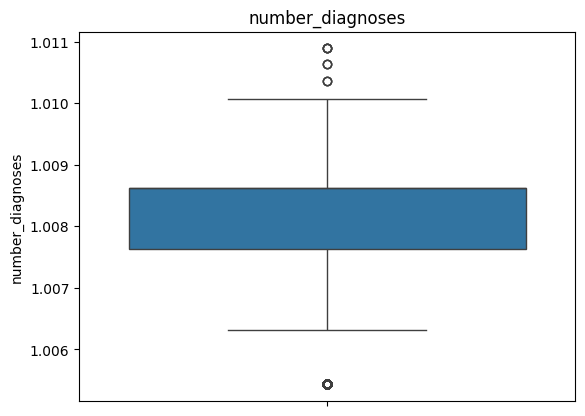

-1.3386017442879492


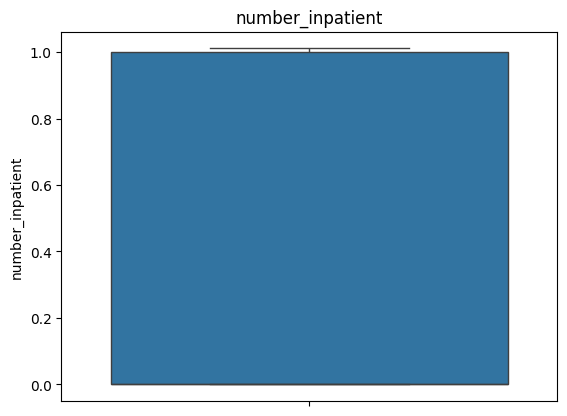

0.9041125502886164


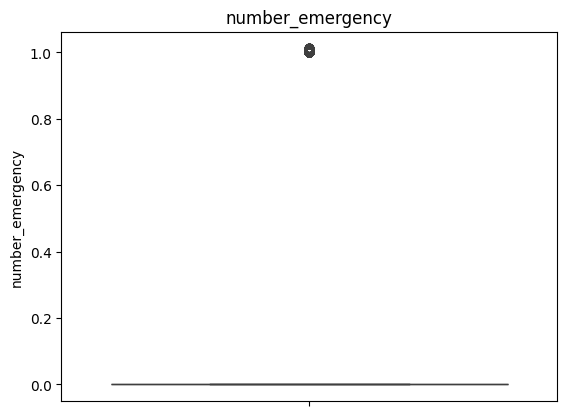

1.8161716395703835


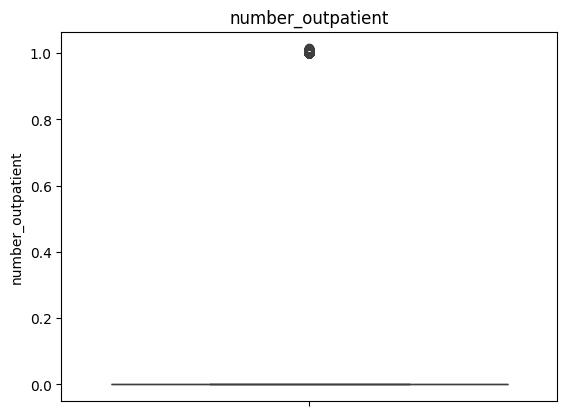

1.5681167778150777


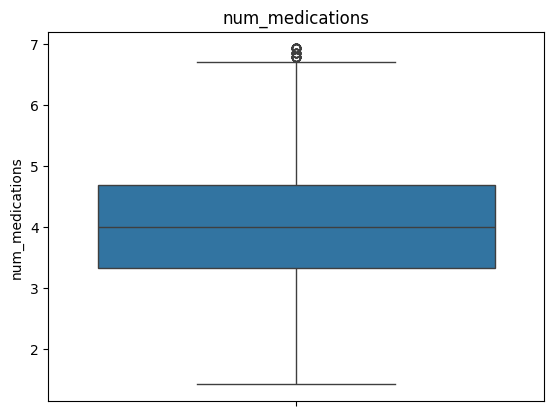

0.09087341813702196


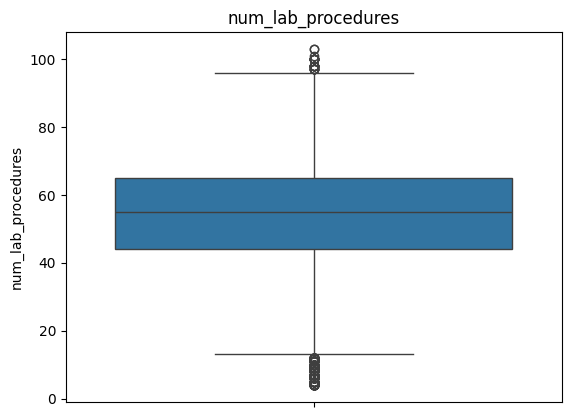

-0.3203703268101672


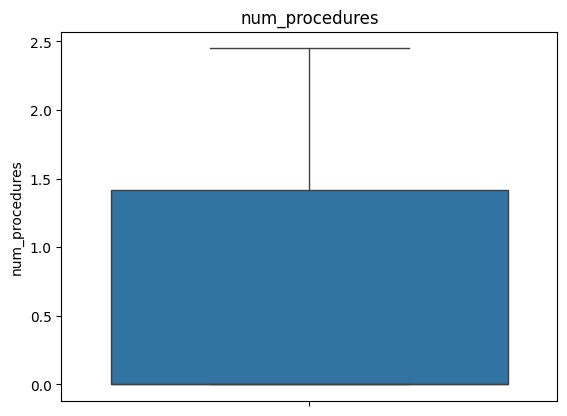

0.6381327382724462


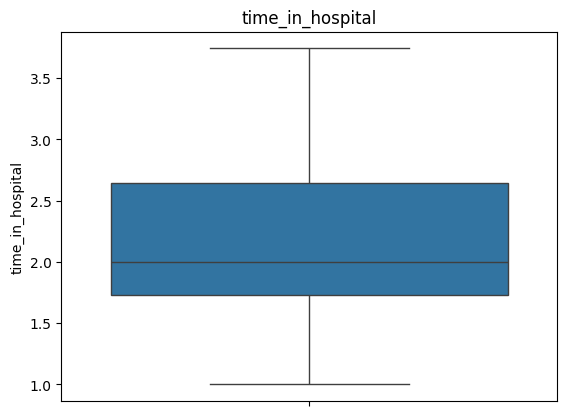

0.3207984764935273


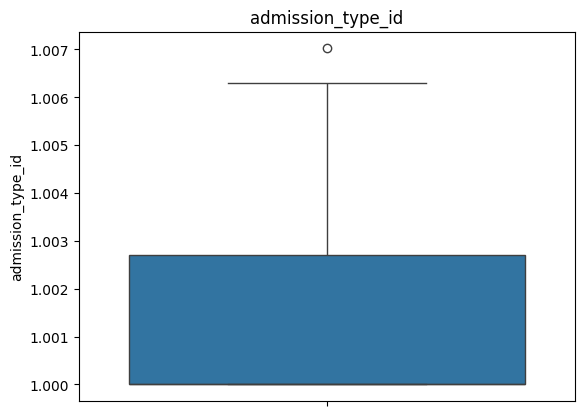

0.9819195021389333


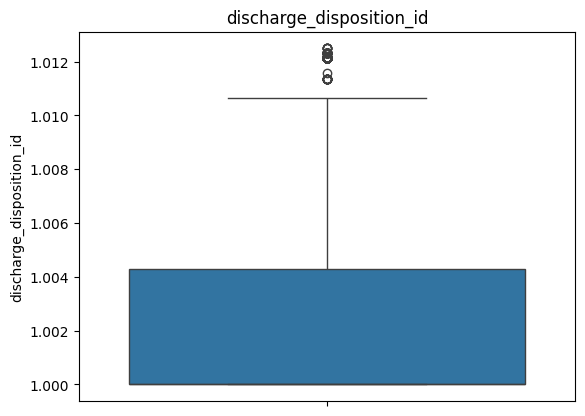

1.1166384099211537


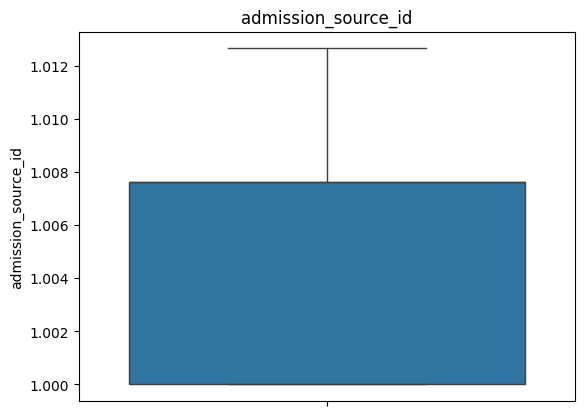

-1.108353039691615


In [58]:
#Treating outliers using Z-score method
def outlier(i):
    mn=df_new2[i].mean()
    std=df_new2[i].std()
    
    upper=mn+(3*std)
    lower=mn-(3*std)
    outliers=(df_new2[i]>upper) | (df_new2[i]<lower)
    m=df_new2[i].median()
    df_new2.loc[outliers,i]=m
    sns.boxplot(y=df_new2[i])
    plt.title(i)
    plt.show()
    print(df_new2[i].skew())
    return
outlier('number_diagnoses')
outlier('number_inpatient')
outlier('number_emergency')
outlier('number_outpatient')
outlier('num_medications')
outlier('num_lab_procedures')
outlier('num_procedures')
outlier('time_in_hospital')
outlier('admission_type_id')
outlier('discharge_disposition_id')
outlier('admission_source_id')


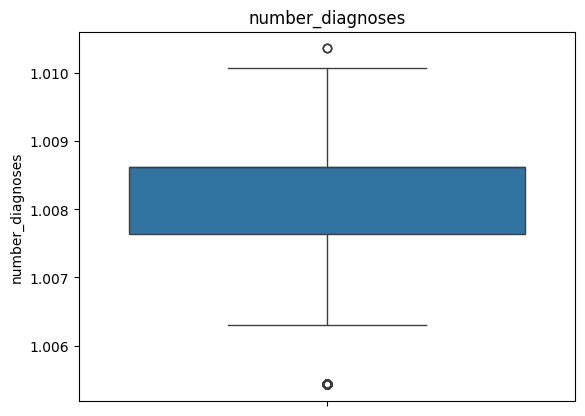

-1.3551740378429362


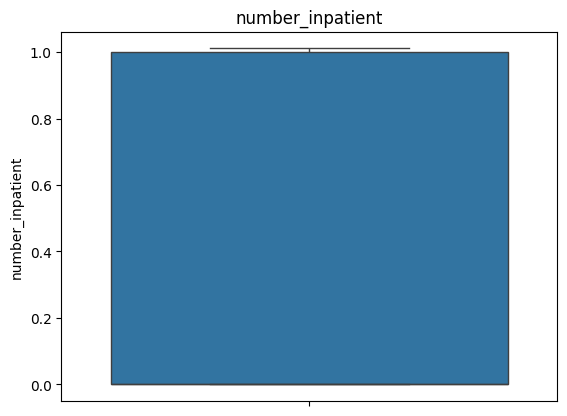

0.9041125502886164


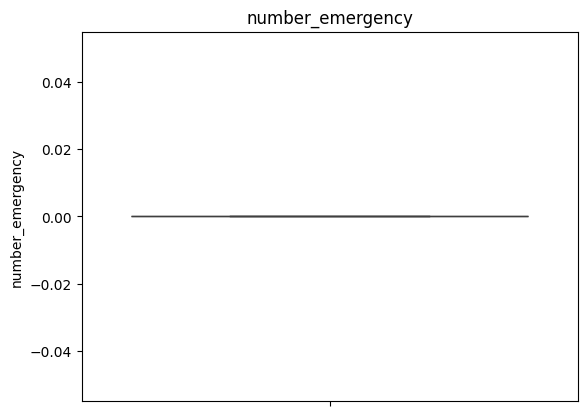

0.0


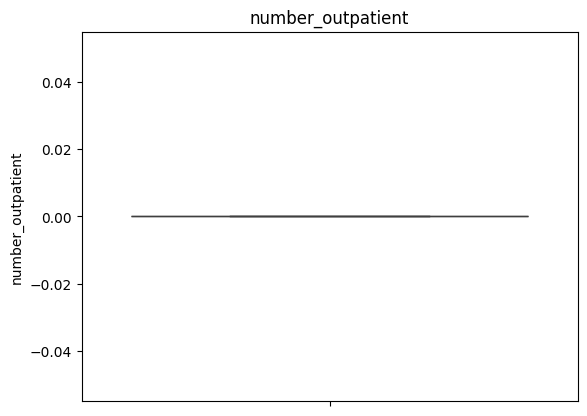

0.0


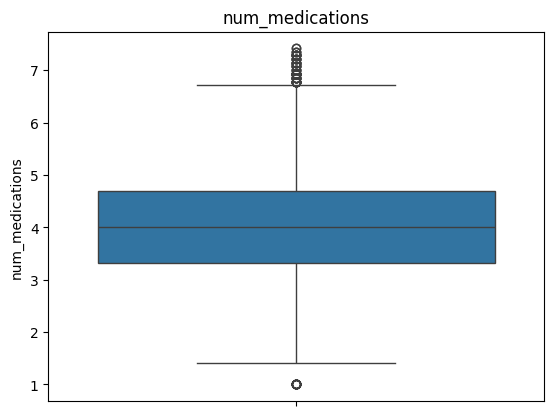

0.11296298184847427


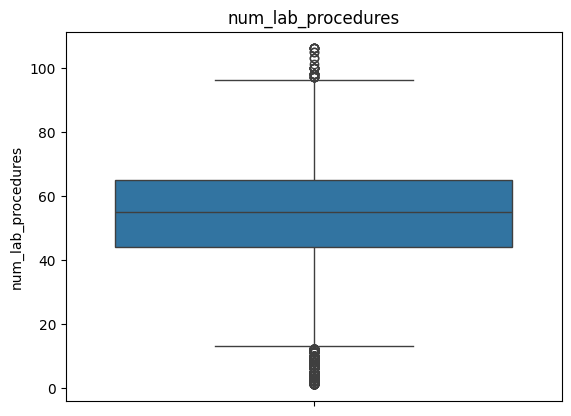

-0.4504376655016255


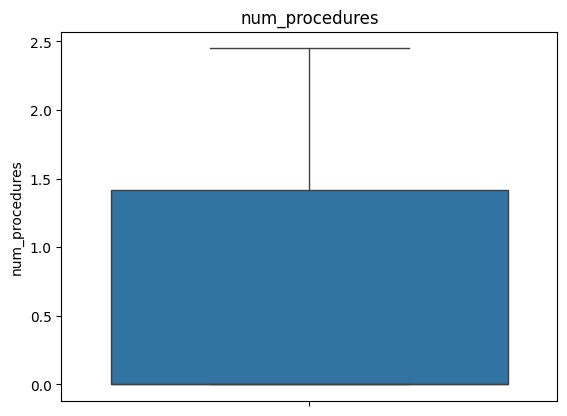

0.6381327382724462


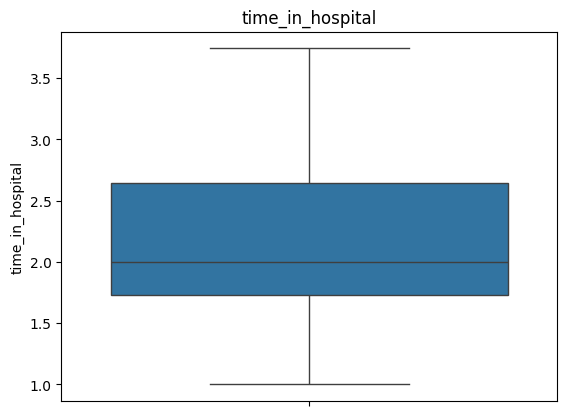

0.3207984764935273


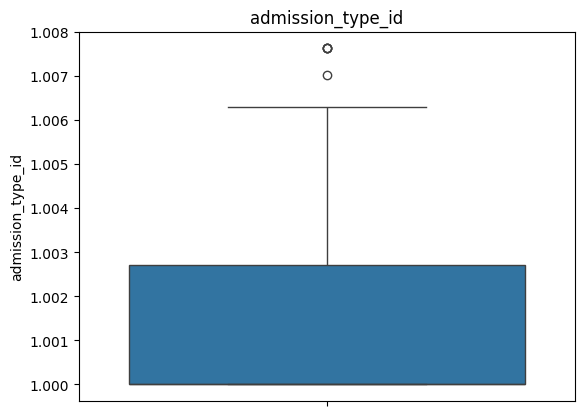

0.9837354375257874


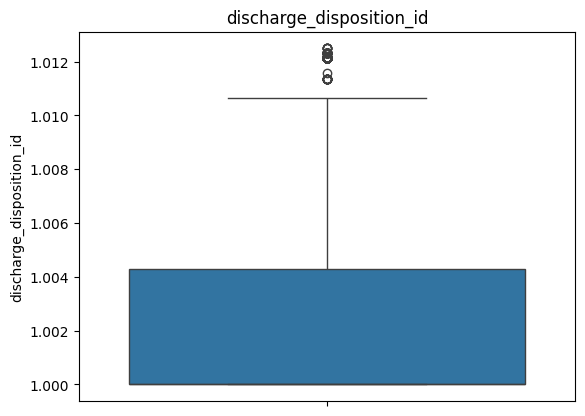

1.1166384099211537


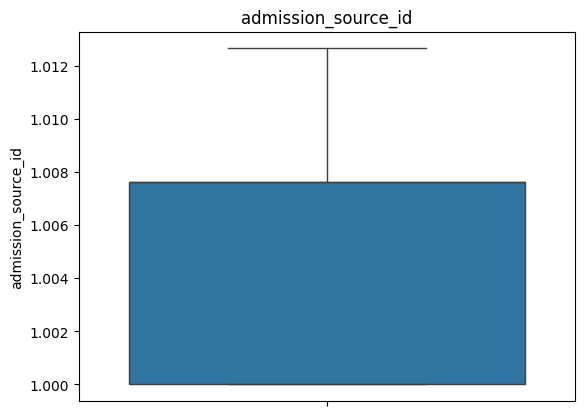

-1.108353039691615


In [59]:
#Treating outliers using IQR method
def outlier(i):
    Q1=df_new1[i].quantile(0.25)
    Q3=df_new1[i].quantile(0.75)
    IQR=Q3-Q1
    upper=Q1+3*IQR
    lower=Q1-3*IQR
    outliers=(df_new1[i]>upper) | (df_new1[i]<lower)
    m=df_new1[i].median()
    df_new1.loc[outliers,i]=m
    sns.boxplot(y=df_new1[i])
    plt.title(i)
    plt.show()
    print(df_new1[i].skew())
    return
outlier('number_diagnoses')
outlier('number_inpatient')
outlier('number_emergency')
outlier('number_outpatient')
outlier('num_medications')
outlier('num_lab_procedures')
outlier('num_procedures')
outlier('time_in_hospital')
outlier('admission_type_id')
outlier('discharge_disposition_id')
outlier('admission_source_id')


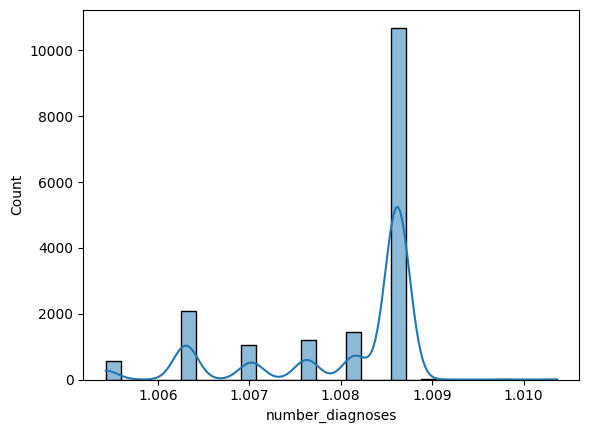

-1.3551740378429362


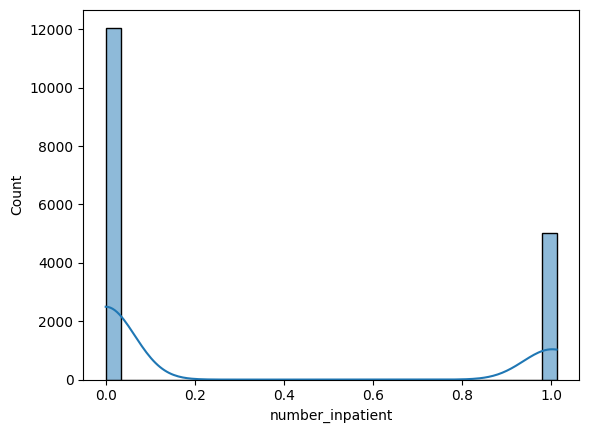

0.9041125502886164


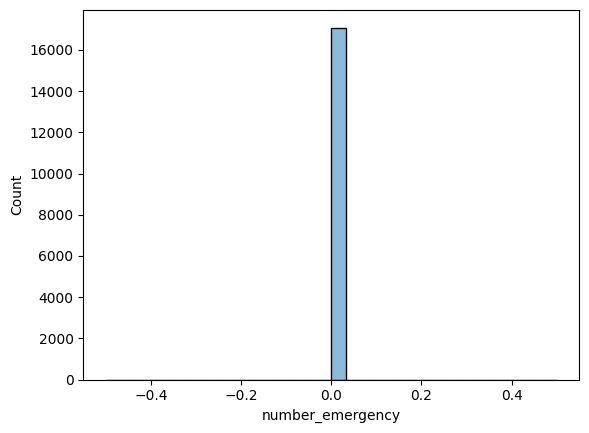

0.0


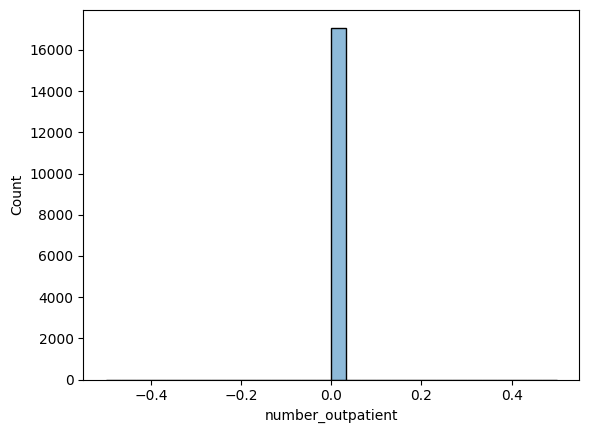

0.0


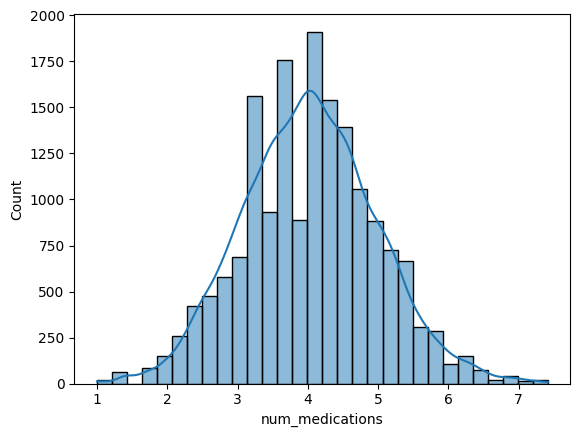

0.11296298184847427


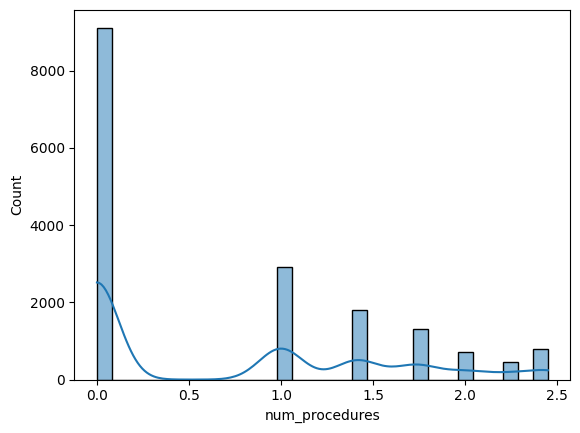

0.6381327382724462


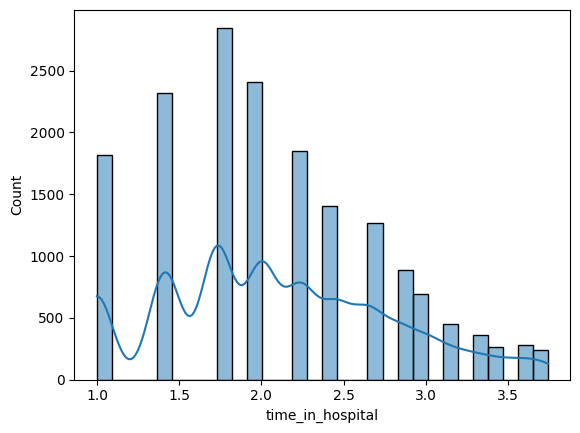

0.3207984764935273


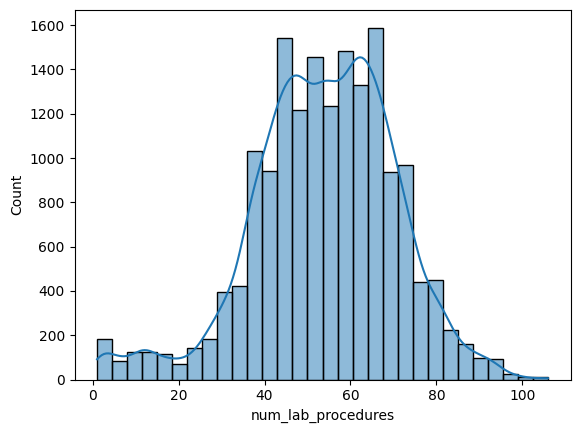

-0.4504376655016255


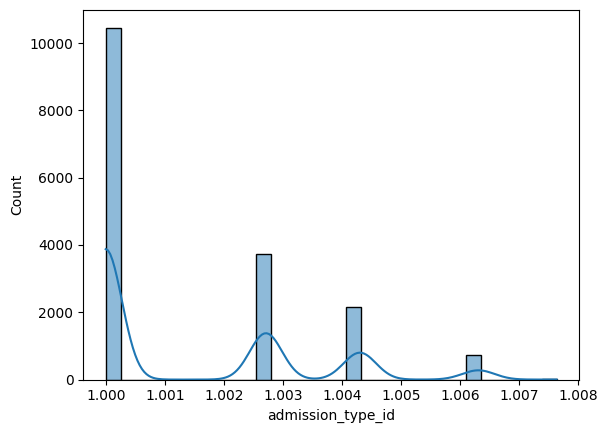

0.9837354375257874


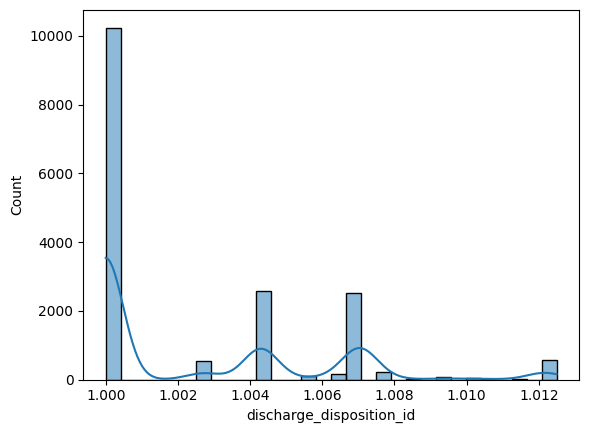

1.1166384099211537


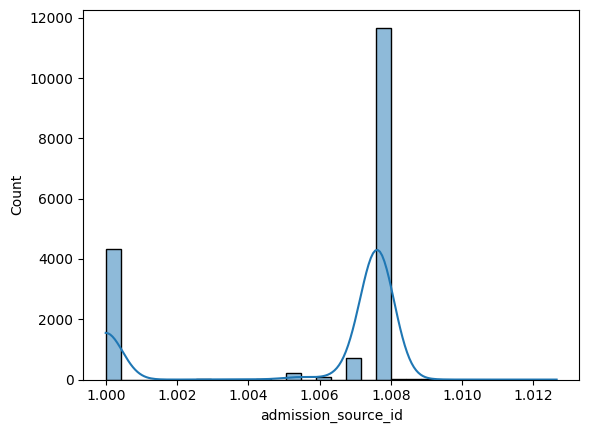

-1.108353039691615


In [60]:
#Resulting histplot after outlier treatment
def n(i):
    sns.histplot(data=df_new1,x=i,bins=30,kde=True)
    plt.show()
    print(df_new1[i].skew())
    return
n('number_diagnoses')
n('number_inpatient')
n('number_emergency')
n('number_outpatient')
n('num_medications')
n('num_procedures')
n('time_in_hospital')
n('num_lab_procedures')
n('admission_type_id')
n('discharge_disposition_id')
n('admission_source_id')


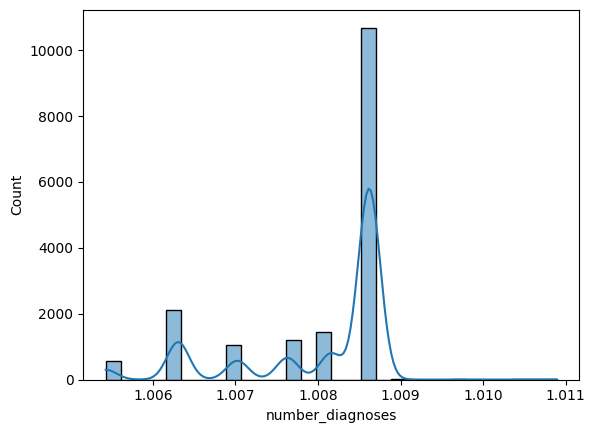

-1.3386017442879492


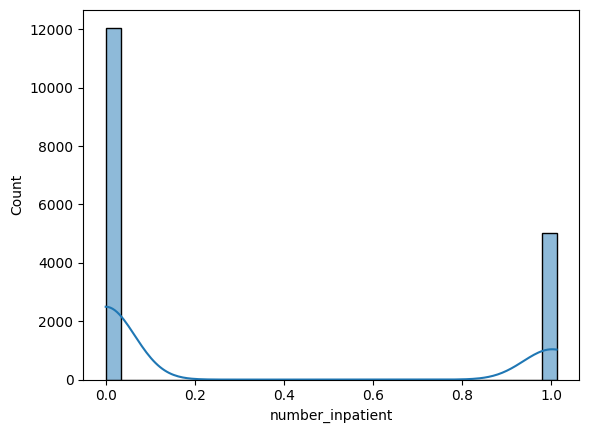

0.9041125502886164


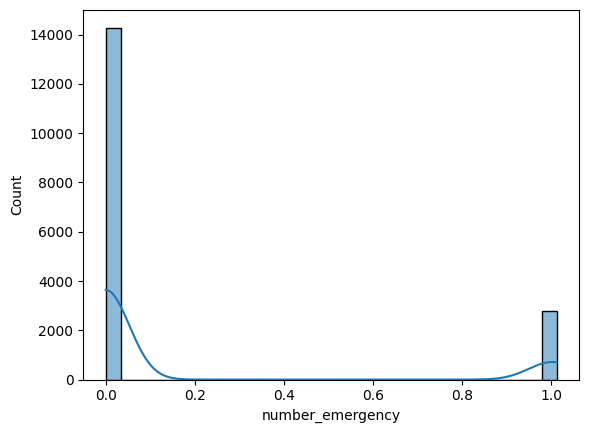

1.8161716395703835


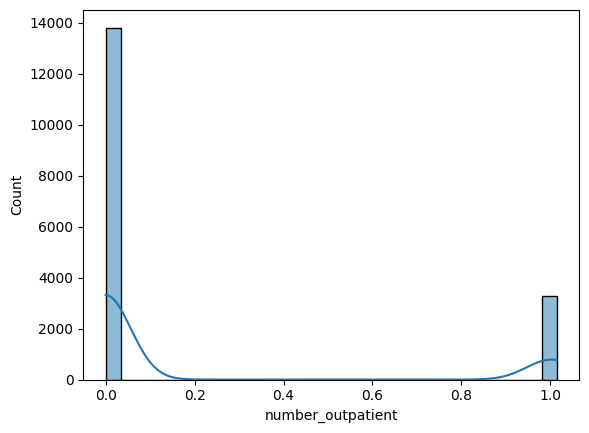

1.5681167778150777


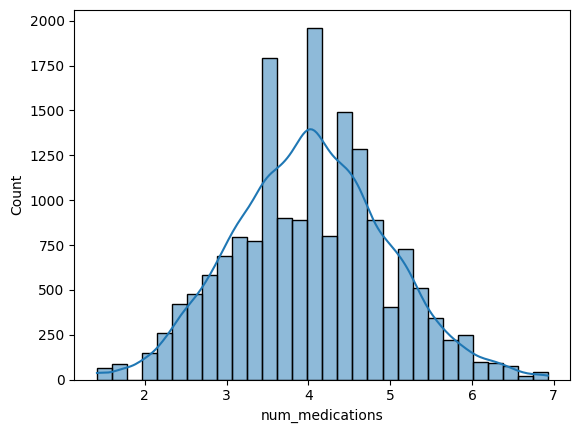

0.09087341813702196


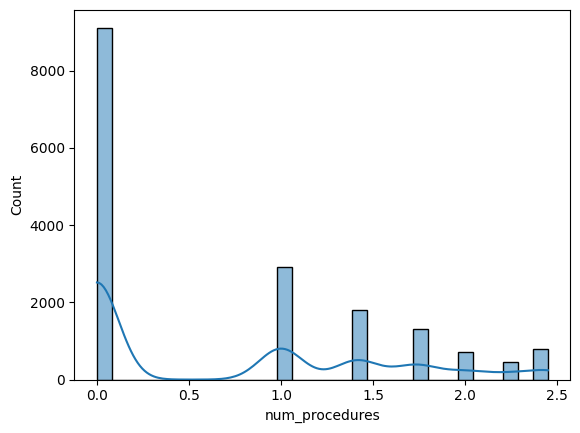

0.6381327382724462


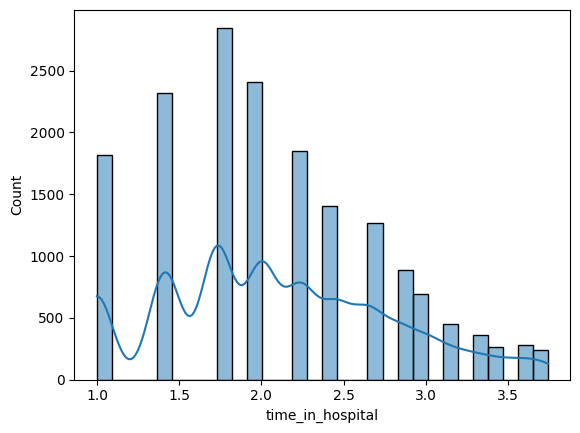

0.3207984764935273


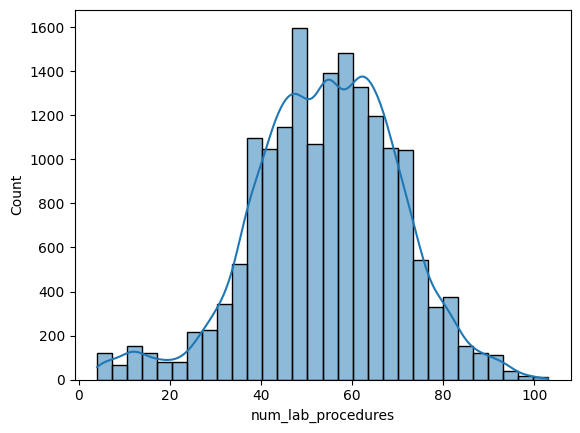

-0.3203703268101672


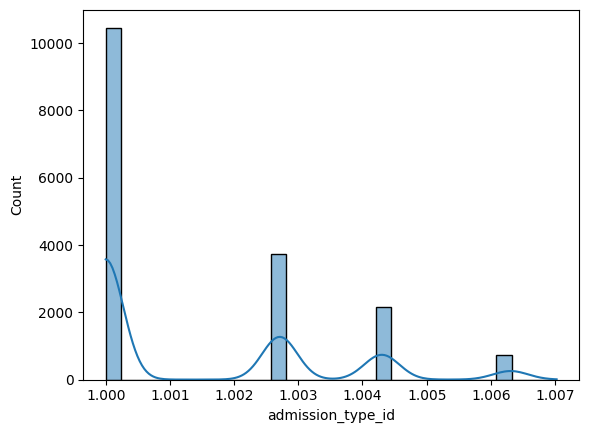

0.9819195021389333


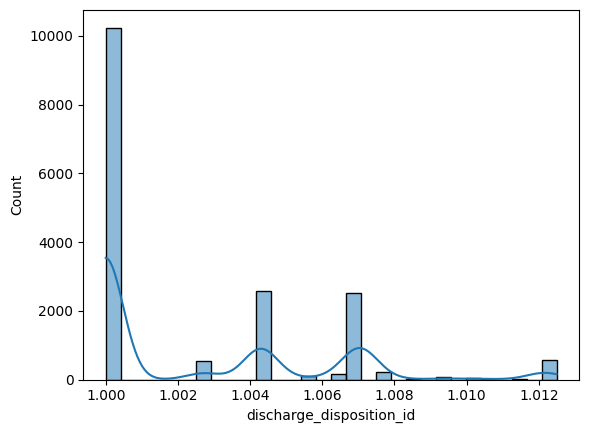

1.1166384099211537


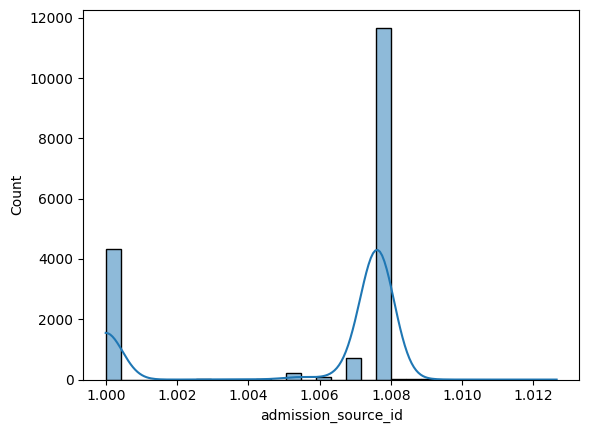

-1.108353039691615


In [61]:
#Resulting histplot after outlier treatment
def n(i):
    sns.histplot(data=df_new2,x=i,bins=30,kde=True)
    plt.show()
    print(df_new2[i].skew())
    return
n('number_diagnoses')
n('number_inpatient')
n('number_emergency')
n('number_outpatient')
n('num_medications')
n('num_procedures')
n('time_in_hospital')
n('num_lab_procedures')
n('admission_type_id')
n('discharge_disposition_id')
n('admission_source_id')


Outliers of the numerical columns are removed and replaced


In [215]:
df_new2

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,num_medications,...,diag_3_V55,diag_3_V57,diag_3_V58,diag_3_V60,diag_3_V61,diag_3_V62,diag_3_V64,diag_3_V65,diag_3_V66,diag_3_V85
0,0,7,1.000000,1.002148,1.003506,3.464102,0.056833,77,2.236068,4.358899,...,False,False,False,False,False,False,False,False,False,False
1,0,3,1.000000,1.000000,1.003506,3.605551,0.453322,75,1.414214,4.000000,...,False,False,False,False,False,False,False,False,False,False
2,0,3,1.001355,1.000000,1.002711,3.316625,0.453322,43,2.236068,4.000000,...,False,False,False,False,False,False,False,False,False,False
3,1,7,1.001355,1.002148,1.000000,3.464102,0.453322,68,1.000000,4.472136,...,False,False,False,False,False,False,False,False,False,False
4,1,7,1.000000,1.002148,1.003808,3.162278,0.453322,59,1.000000,4.472136,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17080,0,4,1.002148,1.000000,1.000000,3.000000,0.084928,52,0.000000,4.795832,...,False,False,False,False,False,False,False,False,False,False
17081,0,5,1.000000,1.002148,1.003808,2.828427,0.046591,62,1.414214,5.477226,...,False,False,False,False,False,False,False,False,False,False
17082,0,6,1.000000,1.002148,1.003808,2.828427,0.453322,81,1.000000,4.472136,...,False,False,False,False,False,False,False,False,False,False
17083,1,5,1.000000,1.000000,1.000000,2.000000,0.091893,43,0.000000,4.472136,...,False,False,False,False,False,False,False,False,False,False


# <font color="#4863A0"> Data Preprocessing 👨‍💻</font>

## <font size="4" face="WildWest">1. Splitting data into "Features" - "Target"</font>

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [65]:
#z-score treated dataset
#Features 'inputs' X
#X=df_new1[['number_diagnoses','num_lab_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','num_procedures','time_in_hospital','diabetesMed']]
X1=df_new2.drop(columns=['readmitted'])



scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X1)
pca=PCA(0.99)
X_pca1=pca.fit_transform(X_scaled1)
# Target variable "Outputs" (Y)
Y1=df_new2['readmitted']
'''from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
X_resampled,Y_resampled=ros.fit_resample(X,Y)
#chi2_ft=SelectKBest(chi2,k=5)
#x=chi2_ft.fit_transform(X,Y)'''

#shape of X & Y to verify the splitting
print('Shape of X:',X_pca1.shape)
#print('Shape of x:',x.shape)
print('Shape of Y:',Y1.shape)

Shape of X: (17085, 1316)
Shape of Y: (17085,)


In [66]:
#IQR treated dataset
#Features 'inputs' X
#X=df_new1[['number_diagnoses','num_lab_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','num_procedures','time_in_hospital','diabetesMed']]
X2=df_new1.drop(columns=['readmitted'])



scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X2)
pca=PCA(0.99)
X_pca2=pca.fit_transform(X_scaled2)
# Target variable "Outputs" (Y)
Y2=df_new1['readmitted']
'''from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
X_resampled,Y_resampled=ros.fit_resample(X,Y)
#chi2_ft=SelectKBest(chi2,k=5)
#x=chi2_ft.fit_transform(X,Y)'''

#shape of X & Y to verify the splitting
print('Shape of X:',X_pca2.shape)
#print('Shape of x:',x.shape)
print('Shape of Y:',Y2.shape)

Shape of X: (17085, 1314)
Shape of Y: (17085,)


##### Splitting into Training -Testing data

In [68]:
#z-score treated
# Split the data into training and testing sets
# X: Features, Y: Target variable
# test_size=0.2 specifies that 20% of the data will be used for testing and 80% for training
# random_state=0 sets the random seed for reproducibility
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_pca1, Y1, test_size=0.2, random_state=0)

# Print the shapes of the training and testing sets to verify the splitting
print("Shape of X_train:", X_train1.shape)
print("Shape of X_test:", X_test1.shape)
print("Shape of Y_train:", Y_train1.shape)
print("Shape of Y_test:", Y_test1.shape)

Shape of X_train: (13668, 1316)
Shape of X_test: (3417, 1316)
Shape of Y_train: (13668,)
Shape of Y_test: (3417,)


In [69]:
# Split the data into training and testing sets
# X: Features, Y: Target variable
# test_size=0.2 specifies that 20% of the data will be used for testing and 80% for training
# random_state=0 sets the random seed for reproducibility
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_pca2, Y2, test_size=0.2, random_state=0)

# Print the shapes of the training and testing sets to verify the splitting
print("Shape of X_train:", X_train2.shape)
print("Shape of X_test:", X_test2.shape)
print("Shape of Y_train:", Y_train2.shape)
print("Shape of Y_test:", Y_test2.shape)

Shape of X_train: (13668, 1314)
Shape of X_test: (3417, 1314)
Shape of Y_train: (13668,)
Shape of Y_test: (3417,)


# <font color="#4863A0"> Model Selection 🧩</font>
Model selection is an essential step in machine learning that involves choosing **the most appropriate model for a given problem**. The goal of model selection is to find a model that generalizes well to unseen data and provides the best performance on the task at hand.
- Importing models for selection process
- Training our models.
    1. Decision Tree Classifier
    2. Random Forest Classifier (Highest Accuracy) 
    3. Naives Bayes
        - GaussianNB (Suitable for continuous data)
        - BernoulliNB (Suitable for binary value)
    4. Logistic Regression 
    5. Ridge Classifier CV
    6. K-Nearest Neighbors (KNN)
    7. MLP Classifier(Multilayer Perceptron)
- For future searching
    8. Support Vector Classifier
    9. Gradient Boosting Classifier

 #### 1.Importing models for selection process

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,RidgeClassifierCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [72]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,accuracy_score,classification_report, roc_auc_score

#### 2.Training machine learning algorithms

### RandomForestClassifier

In [89]:


# Random Forest Classifier Parameters
'''
sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', 
                                        max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                        min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, 
                                        min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                                        n_jobs=None, random_state=None, verbose=0, 
                                        warm_start=False, class_weight=None, ccp_alpha=0.0, 
                                        max_samples=None, monotonic_cst=None)
'''

# n_estimators (The number of trees in the forest)
# max_depth (The maximum depth of the tree.)
# random_state (Controls both the randomness of the bootstrapping of the samples used when building trees)


# Apply SMOTE to the training set only
from imblearn.over_sampling import SMOTE


# Oversampling the training data
smote = SMOTE(random_state=42)
X_resampled1, Y_resampled1 = smote.fit_resample(X_train1, Y_train1)

# Initialize the Random Forest model
rf_model1 = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=42)

# Train the model
rf_model1.fit(X_resampled1, Y_resampled1)

# Predictions on test data
Y_pred1 = rf_model1.predict(X_test1)

# Model evaluation
print("Classification Report:\n", classification_report(Y_test1, Y_pred1))
print("Confusion Matrix:\n", confusion_matrix(Y_test1, Y_pred1))
print("ROC-AUC Score: ", roc_auc_score(Y_test1, rf_model1.predict_proba(X_test1), multi_class='ovr'))

# Training Accuracy
rf_train_accuracy1 = rf_model1.score(X_train1, Y_train1)
print(f"Training Accuracy: {rf_train_accuracy1:.4f}")

# Testing Accuracy
rf_test_accuracy1 = rf_model1.score(X_test1, Y_test1)
print(f"Testing Accuracy: {rf_test_accuracy1:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1153
           1       0.75      0.75      0.75      1135
           2       0.74      0.74      0.74      1129

    accuracy                           0.83      3417
   macro avg       0.83      0.83      0.83      3417
weighted avg       0.83      0.83      0.83      3417

Confusion Matrix:
 [[1145    2    6]
 [   7  849  279]
 [  12  286  831]]
ROC-AUC Score:  0.9433927658571815
Training Accuracy: 0.9999
Testing Accuracy: 0.8267


In [90]:

# Random Forest Classifier Parameters
'''
sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', 
                                        max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                        min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, 
                                        min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                                        n_jobs=None, random_state=None, verbose=0, 
                                        warm_start=False, class_weight=None, ccp_alpha=0.0, 
                                        max_samples=None, monotonic_cst=None)
'''

# n_estimators (The number of trees in the forest)
# max_depth (The maximum depth of the tree.)
# random_state (Controls both the randomness of the bootstrapping of the samples used when building trees)


# Apply SMOTE to the training set only
from imblearn.over_sampling import SMOTE


# Oversampling the training data
smote = SMOTE(random_state=42)
X_resampled2, Y_resampled2 = smote.fit_resample(X_train2, Y_train2)

# Initialize the Random Forest model
rf_model2 = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=42)

# Train the model
rf_model2.fit(X_resampled2, Y_resampled2)

# Predictions on test data
Y_pred2 = rf_model2.predict(X_test2)

# Model evaluation
print("Classification Report:\n", classification_report(Y_test2, Y_pred2))
print("Confusion Matrix:\n", confusion_matrix(Y_test2, Y_pred2))
print("ROC-AUC Score: ", roc_auc_score(Y_test2, rf_model2.predict_proba(X_test2), multi_class='ovr'))

# Training Accuracy
rf_train_accuracy2 = rf_model2.score(X_train2, Y_train2)
print(f"Training Accuracy: {rf_train_accuracy2:.4f}")

# Testing Accuracy
rf_test_accuracy2 = rf_model2.score(X_test2, Y_test2)
print(f"Testing Accuracy: {rf_test_accuracy2:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1153
           1       0.72      0.74      0.73      1135
           2       0.73      0.71      0.72      1129

    accuracy                           0.81      3417
   macro avg       0.81      0.81      0.81      3417
weighted avg       0.81      0.81      0.81      3417

Confusion Matrix:
 [[1145    0    8]
 [  11  837  287]
 [  13  320  796]]
ROC-AUC Score:  0.9391885903361453
Training Accuracy: 0.9996
Testing Accuracy: 0.8130


### DecisionTreeClassifier

In [93]:

#z-score
#model_dt=DecisionTreeClassifier(max_depth=10,min_samples_split=10,min_samples_leaf=5)
'''
sklearn.tree.DecisionTreeClassifier(*, criterion='gini', 
                                    splitter='best', max_depth=None, 
                                    min_samples_split=2, min_samples_leaf=1, 
                                    min_weight_fraction_leaf=0.0, max_features=None, 
                                    random_state=None, max_leaf_nodes=None, 
                                    min_impurity_decrease=0.0, class_weight=None, 
                                    ccp_alpha=0.0, monotonic_cst=None)
'''

# max_depth (The maximum depth of the tree "It is the number of layers of the longest branch of the tree")
# min_samples_split (The minimum number of samples required to split an internal node "2 by default")
# min_samples_leaf (The minimum number of samples required to be at a leaf node)
# max_features (The number of features to consider when looking for the best split)

# Initialize the Decision Tree model
dt_model1 = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model1.fit(X_train1, Y_train1)

# Predictions on test data
Y_pred1 = dt_model1.predict(X_test1)

# Model evaluation
print("Classification Report:\n", classification_report(Y_test1, Y_pred1))
print("Confusion Matrix:\n", confusion_matrix(Y_test1, Y_pred1))

# For multi-class ROC-AUC score (One-vs-Rest strategy)
roc_auc = roc_auc_score(Y_test1, dt_model1.predict_proba(X_test1), multi_class='ovr')
print("ROC-AUC Score: ", roc_auc)

# Training Accuracy
dt_train_accuracy1 = dt_model1.score(X_train1, Y_train1)
print(f"Training Accuracy: {dt_train_accuracy1:.4f}")

# Testing Accuracy
dt_test_accuracy1 = dt_model1.score(X_test1, Y_test1)
print(f"Testing Accuracy: {dt_test_accuracy1:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1153
           1       0.68      0.76      0.72      1135
           2       0.72      0.53      0.61      1129

    accuracy                           0.76      3417
   macro avg       0.75      0.76      0.75      3417
weighted avg       0.76      0.76      0.75      3417

Confusion Matrix:
 [[1146    4    3]
 [  47  860  228]
 [ 136  398  595]]
ROC-AUC Score:  0.8201166667748293
Training Accuracy: 1.0000
Testing Accuracy: 0.7612


In [76]:
#IQR treated
#model_dt=DecisionTreeClassifier(max_depth=10,min_samples_split=10,min_samples_leaf=5)
'''
sklearn.tree.DecisionTreeClassifier(*, criterion='gini', 
                                    splitter='best', max_depth=None, 
                                    min_samples_split=2, min_samples_leaf=1, 
                                    min_weight_fraction_leaf=0.0, max_features=None, 
                                    random_state=None, max_leaf_nodes=None, 
                                    min_impurity_decrease=0.0, class_weight=None, 
                                    ccp_alpha=0.0, monotonic_cst=None)
'''

# max_depth (The maximum depth of the tree "It is the number of layers of the longest branch of the tree")
# min_samples_split (The minimum number of samples required to split an internal node "2 by default")
# min_samples_leaf (The minimum number of samples required to be at a leaf node)
# max_features (The number of features to consider when looking for the best split)

# Initialize the Decision Tree model
dt_model2 = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model2.fit(X_train2, Y_train2)

# Predictions on test data
Y_pred2 = dt_model2.predict(X_test2)

# Model evaluation
print("Classification Report:\n", classification_report(Y_test2, Y_pred2))
print("Confusion Matrix:\n", confusion_matrix(Y_test2, Y_pred2))

# For multi-class ROC-AUC score (One-vs-Rest strategy)
roc_auc = roc_auc_score(Y_test2, dt_model2.predict_proba(X_test2), multi_class='ovr')
print("ROC-AUC Score: ", roc_auc)

# Training Accuracy
dt_train_accuracy2 = dt_model2.score(X_train2, Y_train2)
print(f"Training Accuracy: {dt_train_accuracy2:.4f}")

# Testing Accuracy
dt_test_accuracy2 = dt_model2.score(X_test2, Y_test2)
print(f"Testing Accuracy: {dt_test_accuracy2:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      1153
           1       0.69      0.76      0.72      1135
           2       0.73      0.52      0.61      1129

    accuracy                           0.76      3417
   macro avg       0.75      0.76      0.75      3417
weighted avg       0.75      0.76      0.75      3417

Confusion Matrix:
 [[1145    0    8]
 [  57  863  215]
 [ 144  396  589]]
ROC-AUC Score:  0.8192227797067062
Training Accuracy: 1.0000
Testing Accuracy: 0.7600


### KNN

In [79]:
# K-Nearest Neighbors (KNN) Parameters
'''
sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, 
                                       weights='uniform', algorithm='auto', 
                                       leaf_size=30, p=2, 
                                       metric='minkowski', 
                                       metric_params=None, n_jobs=None)
'''

# n_neighbors (Number of neighbors to use by default for kneighbors queries.)
# metric (Metric to use for distance computation.)
# n_jobs (The number of parallel jobs to run for neighbors search.)


# Initialize the KNN model
knn_model1 = KNeighborsClassifier(n_neighbors=4,weights='distance',leaf_size=50,p=2)

# Train the model
knn_model1.fit(X_train1, Y_train1)

# Predictions on test data
Y_pred1 = knn_model1.predict(X_test1)

# Model evaluation
print("Classification Report:\n", classification_report(Y_test1, Y_pred1))
print("Confusion Matrix:\n", confusion_matrix(Y_test1, Y_pred1))

# For multi-class ROC-AUC score (One-vs-Rest strategy)
roc_auc = roc_auc_score(Y_test1, knn_model1.predict_proba(X_test1), multi_class='ovr')
print("ROC-AUC Score: ", roc_auc)

# Training Accuracy
knn_train_accuracy1 = knn_model1.score(X_train1, Y_train1)
print(f"Training Accuracy: {knn_train_accuracy1:.4f}")

# Testing Accuracy
knn_test_accuracy1 = knn_model1.score(X_test1, Y_test1)
print(f"Testing Accuracy: {knn_test_accuracy1:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      1153
           1       0.69      0.75      0.72      1135
           2       0.73      0.48      0.58      1129

    accuracy                           0.74      3417
   macro avg       0.74      0.74      0.73      3417
weighted avg       0.74      0.74      0.73      3417

Confusion Matrix:
 [[1146    6    1]
 [  82  851  202]
 [ 210  379  540]]
ROC-AUC Score:  0.8891056590645131
Training Accuracy: 1.0000
Testing Accuracy: 0.7425


In [80]:
# K-Nearest Neighbors (KNN) Parameters
'''
sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, 
                                       weights='uniform', algorithm='auto', 
                                       leaf_size=30, p=2, 
                                       metric='minkowski', 
                                       metric_params=None, n_jobs=None)
'''

# n_neighbors (Number of neighbors to use by default for kneighbors queries.)
# metric (Metric to use for distance computation.)
# n_jobs (The number of parallel jobs to run for neighbors search.)


# Initialize the KNN model
knn_model2 = KNeighborsClassifier(n_neighbors=4,weights='distance',leaf_size=50,p=2)

# Train the model
knn_model2.fit(X_train2, Y_train2)

# Predictions on test data
Y_pred2 = knn_model2.predict(X_test2)

# Model evaluation
print("Classification Report:\n", classification_report(Y_test2, Y_pred2))
print("Confusion Matrix:\n", confusion_matrix(Y_test2, Y_pred2))

# For multi-class ROC-AUC score (One-vs-Rest strategy)
roc_auc = roc_auc_score(Y_test2, knn_model2.predict_proba(X_test2), multi_class='ovr')
print("ROC-AUC Score: ", roc_auc)

# Training Accuracy
knn_train_accuracy2 = knn_model2.score(X_train2, Y_train2)
print(f"Training Accuracy: {knn_train_accuracy2:.4f}")

# Testing Accuracy
knn_test_accuracy2 = knn_model2.score(X_test2, Y_test2)
print(f"Testing Accuracy: {knn_test_accuracy2:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      1153
           1       0.69      0.75      0.72      1135
           2       0.73      0.47      0.58      1129

    accuracy                           0.74      3417
   macro avg       0.74      0.74      0.73      3417
weighted avg       0.74      0.74      0.73      3417

Confusion Matrix:
 [[1146    6    1]
 [  86  854  195]
 [ 209  384  536]]
ROC-AUC Score:  0.885808535884482
Training Accuracy: 1.0000
Testing Accuracy: 0.7422


#### seems dataset outliers treated using IQR and Z-Score method shows almost same accuracy, so continues using only one


#### Logistic Regression

In [82]:


# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg_model.fit(X_train1, Y_train1)

# Predictions on test data
Y_pred1 = log_reg_model.predict(X_test1)

# Model evaluation
print("Classification Report:\n", classification_report(Y_test1, Y_pred1))
print("Confusion Matrix:\n", confusion_matrix(Y_test1, Y_pred1))

# For multi-class ROC-AUC score (One-vs-Rest strategy)
roc_auc = roc_auc_score(Y_test1, log_reg_model.predict_proba(X_test1), multi_class='ovr')
print("ROC-AUC Score: ", roc_auc)

# Training Accuracy
log_train_accuracy = log_reg_model.score(X_train1, Y_train1)
print(f"Training Accuracy: {log_train_accuracy:.4f}")

# Testing Accuracy
log_test_accuracy = log_reg_model.score(X_test1, Y_test1)
print(f"Testing Accuracy: {log_test_accuracy:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.64      0.61      1153
           1       0.52      0.48      0.50      1135
           2       0.53      0.53      0.53      1129

    accuracy                           0.55      3417
   macro avg       0.55      0.55      0.55      3417
weighted avg       0.55      0.55      0.55      3417

Confusion Matrix:
 [[733 219 201]
 [275 545 315]
 [245 291 593]]
ROC-AUC Score:  0.729360271520069
Training Accuracy: 0.6190
Testing Accuracy: 0.5476


### Gaussian Naive Bayes

In [83]:
# Gaussian Naive Bayes Parameters
'''
sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)
'''

# var_smoothing (Portion of the largest variance of all features that is added to variances for calculation stability.)

# Initialize the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(X_train1, Y_train1)

# Predictions on test data
Y_pred1 = gnb_model.predict(X_test1)

# Model evaluation
print("Classification Report:\n", classification_report(Y_test1, Y_pred1))
print("Confusion Matrix:\n", confusion_matrix(Y_test1, Y_pred1))

# For multi-class ROC-AUC score (One-vs-Rest strategy)
roc_auc = roc_auc_score(Y_test1, gnb_model.predict_proba(X_test1), multi_class='ovr')
print("ROC-AUC Score: ", roc_auc)

# Training Accuracy
gnb_train_accuracy = gnb_model.score(X_train1, Y_train1)
print(f"Training Accuracy: {gnb_train_accuracy:.4f}")

# Testing Accuracy
gnb_test_accuracy = gnb_model.score(X_test1, Y_test1)
print(f"Testing Accuracy: {gnb_test_accuracy:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.91      0.53      1153
           1       0.38      0.03      0.05      1135
           2       0.47      0.22      0.30      1129

    accuracy                           0.39      3417
   macro avg       0.41      0.39      0.29      3417
weighted avg       0.41      0.39      0.30      3417

Confusion Matrix:
 [[1053   13   87]
 [ 911   29  195]
 [ 844   34  251]]
ROC-AUC Score:  0.5469988108542282
Training Accuracy: 0.3918
Testing Accuracy: 0.3901


### Bernoulli Naive Bayes

In [84]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# Initialize the Bernoulli Naive Bayes model
bnb_model = BernoulliNB()

# Train the model
bnb_model.fit(X_train1, Y_train1)

# Predictions on test data
Y_pred1 = bnb_model.predict(X_test1)

# Model evaluation
print("Classification Report:\n", classification_report(Y_test1, Y_pred1))
print("Confusion Matrix:\n", confusion_matrix(Y_test1, Y_pred1))

# For multi-class ROC-AUC score (One-vs-Rest strategy)
roc_auc = roc_auc_score(Y_test1, bnb_model.predict_proba(X_test1), multi_class='ovr')
print("ROC-AUC Score: ", roc_auc)

# Training Accuracy
bnb_train_accuracy = bnb_model.score(X_train1, Y_train1)
print(f"Training Accuracy: {bnb_train_accuracy:.4f}")

# Testing Accuracy
bnb_test_accuracy = bnb_model.score(X_test1, Y_test1)
print(f"Testing Accuracy: {bnb_test_accuracy:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.49      0.52      1153
           1       0.47      0.42      0.45      1135
           2       0.46      0.55      0.50      1129

    accuracy                           0.49      3417
   macro avg       0.49      0.49      0.49      3417
weighted avg       0.49      0.49      0.49      3417

Confusion Matrix:
 [[568 265 320]
 [249 482 404]
 [223 282 624]]
ROC-AUC Score:  0.6627103814556603
Training Accuracy: 0.5303
Testing Accuracy: 0.4899


### Ridge Classifier CV

In [85]:
# Ridge Classifier CV Parameters
'''
sklearn.linear_model.RidgeClassifierCV(alphas=(0.1, 1.0, 10.0), *, 
                                       fit_intercept=True, scoring=None, 
                                       cv=None, class_weight=None, 
                                       store_cv_values=False)
'''
# alphas (Array of alpha values to try. Regularization strength)
# cv (Determines the cross-validation splitting strategy.)

# Initialize the Ridge Classifier with Cross-Validation
ridge_model = RidgeClassifierCV(store_cv_values=True)

# Train the model
ridge_model.fit(X_train1, Y_train1)

# Predictions on test data
Y_pred1 = ridge_model.predict(X_test1)

# Model evaluation
print("Classification Report:\n", classification_report(Y_test1, Y_pred1))
print("Confusion Matrix:\n", confusion_matrix(Y_test1, Y_pred1))

# Since RidgeClassifierCV does not support predict_proba, we will not calculate ROC-AUC here

# Training Accuracy
ridge_train_accuracy = ridge_model.score(X_train1, Y_train1)
print(f"Training Accuracy: {ridge_train_accuracy:.4f}")

# Testing Accuracy
ridge_test_accuracy = ridge_model.score(X_test1, Y_test1)
print(f"Testing Accuracy: {ridge_test_accuracy:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.61      0.59      1153
           1       0.50      0.47      0.48      1135
           2       0.51      0.51      0.51      1129

    accuracy                           0.53      3417
   macro avg       0.53      0.53      0.53      3417
weighted avg       0.53      0.53      0.53      3417

Confusion Matrix:
 [[705 235 213]
 [262 528 345]
 [261 289 579]]
Training Accuracy: 0.6060
Testing Accuracy: 0.5303


### MLPClassifier

In [86]:


# Create model object
'''clf = MLPClassifier(hidden_layer_sizes=(110,8),
                    random_state=7,
                    verbose=True,
                    learning_rate_init=0.01)'''
#Parameters:

#hidden_layer_sizes: it is a tuple where each element represents one layer and its value represents the number of neurons on each hidden layer.
#learning_rate_init: It used to controls the step-size in updating the weights. 
#activation: Activation function for the hidden layer. Examples, identity, logistic, tanh, and relu. by default, relu is used as an activation function.
#random_state: It defines the random number for weights and bias initialization. 
#verbose: It used to print progress messages to standard output.

# Fit data onto the model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Train the model
mlp_model.fit(X_train1, Y_train1)

# Predictions on test data
Y_pred1 = mlp_model.predict(X_test1)

# Model evaluation
print("Classification Report:\n", classification_report(Y_test1, Y_pred1))
print("Confusion Matrix:\n", confusion_matrix(Y_test1, Y_pred1))

# For multi-class ROC-AUC score (One-vs-Rest strategy)
roc_auc = roc_auc_score(Y_test1, mlp_model.predict_proba(X_test1), multi_class='ovr')
print("ROC-AUC Score: ", roc_auc)

# Training Accuracy
mlp_train_accuracy = mlp_model.score(X_train1, Y_train1)
print(f"Training Accuracy: {mlp_train_accuracy:.4f}")

# Testing Accuracy
mlp_test_accuracy = mlp_model.score(X_test1, Y_test1)
print(f"Testing Accuracy: {mlp_test_accuracy:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.95      1153
           1       0.74      0.77      0.75      1135
           2       0.76      0.65      0.70      1129

    accuracy                           0.80      3417
   macro avg       0.80      0.80      0.80      3417
weighted avg       0.80      0.80      0.80      3417

Confusion Matrix:
 [[1145    2    6]
 [  40  869  226]
 [  83  310  736]]
ROC-AUC Score:  0.9010148867016688
Training Accuracy: 0.9955
Testing Accuracy: 0.8048


In [94]:
# Dictionary to store model names and their respective training scores (key:value)
model_train_scores = {
    "Model 1-Decision Tree Classifier": dt_train_accuracy1,
    "Model 2-Random Forest Classifier": rf_train_accuracy1,
    "Model 3-GaussianNB": gnb_train_accuracy,
    "Model 3-BernoulliNB": bnb_train_accuracy,
    "Model 4-Logistic Regression": log_train_accuracy,
    "Model 5-Ridge Classifier CV": ridge_train_accuracy,
    "Model 6-K-Nearest Neighbors (KNN)": knn_train_accuracy1,
    'Model 7-MLP-classifier ':mlp_train_accuracy
}

# Loop through each model and print the training score
for model_name, accuracy in model_train_scores.items():
    print(f"{model_name:<50} Training Score: {accuracy*100}")

Model 1-Decision Tree Classifier                   Training Score: 100.0
Model 2-Random Forest Classifier                   Training Score: 99.99268364062043
Model 3-GaussianNB                                 Training Score: 39.17910447761194
Model 3-BernoulliNB                                Training Score: 53.02897278314311
Model 4-Logistic Regression                        Training Score: 61.90371671056483
Model 5-Ridge Classifier CV                        Training Score: 60.60140474100088
Model 6-K-Nearest Neighbors (KNN)                  Training Score: 100.0
Model 7-MLP-classifier                             Training Score: 99.5463857184665


In [95]:
# Dictionary to store model names and their respective testing scores
model_test_scores = {
    "Model 1-Decision Tree Classifier": dt_test_accuracy1,
    "Model 2-Random Forest Classifier": rf_test_accuracy1,
    "Model 3-GaussianNB": gnb_test_accuracy,
    "Model 3-BernoulliNB": bnb_test_accuracy,
    "Model 4-Logistic Regression": log_test_accuracy,
    "Model 5-Ridge Classifier CV": ridge_test_accuracy,
    "Model 6-K-Nearest Neighbors (KNN)": knn_test_accuracy1,
    'Model 7-MLP-classifier ': mlp_test_accuracy
}

# Loop through each model and print the testing score
for model_name, accuracy in model_test_scores.items():
    print(f"{model_name:<50} Testing Score: {accuracy*100}")

Model 1-Decision Tree Classifier                   Testing Score: 76.11940298507463
Model 2-Random Forest Classifier                   Testing Score: 82.67486098917178
Model 3-GaussianNB                                 Testing Score: 39.010828211881766
Model 3-BernoulliNB                                Testing Score: 48.99034240561896
Model 4-Logistic Regression                        Testing Score: 54.75563359672228
Model 5-Ridge Classifier CV                        Testing Score: 53.02897278314311
Model 6-K-Nearest Neighbors (KNN)                  Testing Score: 74.246414983904
Model 7-MLP-classifier                             Testing Score: 80.47995317529997


The best models in accuracy are models 1 & 2 & 6 : **Decision Tree Classifier** , **MLP classifier**, **Random Forest Classifier** and **K-Nearest Neighbors (KNN)** with accuracy **76.11%**,**80.47**,**82.67%**, & **74.24%** respectively. Which we can choose any one of them for our *deployment*. I have chosen **Random Forest Classifier** model.

# <font color="#4863A0"> Model Deployment 🛠️</font>

In [97]:
import pickle
import os
# File mode explanation:
# 'r'  - open for reading (default)
# 'w'  - open for writing, truncating the file first
# 'x'  - create a new file and open it for writing
# 'a'  - open for writing, appending to the end of the file if it exists
# 'b'  - binary mode
# 't'  - text mode (default)
# '+'  - open a disk file for updating (reading and writing)
# 'U'  - universal newline mode (deprecated)

# Define the filename for the pickle file
filename = 'model.pkl'

# Save (serialize) the model to the file using pickle


# Save the model to the file using pickle
with open(filename, 'wb') as file:
    pickle.dump(rf_model1, file)
print(f"Model saved to {os.path.join(os.getcwd(), filename)}")

Model saved to C:\Users\nikhi\jupyter notebbok class\model.pkl


### Predict Using Unseen Data
**Load the Model:** Deserialize the saved model using pickle.load.


**Prepare the Unseen Data:** Ensure the data preprocessing steps (e.g., scaling, encoding, feature selection) match those used during training.


**Make Predictions:** Use the model's .predict method on the preprocessed unseen data.

In [104]:
# Load (deserialize) the model from the file using pickle
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Print a confirmation
print("Model loaded successfully!")
unseen_data=X_test1
# Example: Use the loaded model for predictions
# Assuming 'unseen_data' is preprocessed and available
predictions = loaded_model.predict(unseen_data)

# Print predictions
print("Predictions on unseen data:", predictions)

print("Classification Report:\n", classification_report(Y_test1, predictions))
print("Confusion Matrix:\n", confusion_matrix(Y_test1, predictions))

Model loaded successfully!
Predictions on unseen data: [2 2 1 ... 1 0 0]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1153
           1       0.75      0.75      0.75      1135
           2       0.74      0.74      0.74      1129

    accuracy                           0.83      3417
   macro avg       0.83      0.83      0.83      3417
weighted avg       0.83      0.83      0.83      3417

Confusion Matrix:
 [[1145    2    6]
 [   7  849  279]
 [  12  286  831]]


### Overall Accuracy:
**The model achieved an 83% accuracy, indicating good generalization on the test data.**